In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *
from data_manager import *

Setting environment for Precision WorkStation


No vtk


In [2]:
from aligner_v3 import Aligner

# Global

In [3]:
brain_m_spec = dict(name='atlasV6',
                   vol_type='score',
                   resolution='10.0um')

brain_f_spec = dict(name='MD589',
                   vol_type='score',
                    detector_id=998,
                   resolution='10.0um')

global_alignment_spec = dict(stack_m=brain_m_spec, 
                             stack_f=brain_f_spec,
                             warp_setting=20)

In [4]:
global_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=global_alignment_spec,
# structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
# structures_m=['5N_L', '5N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', '12N', 'SC', 'IC']
# structures_m=['7N_L'],
# structures_m=['RMC_L', '3N_L', 'SNR_L'],
# structures_m=['5N_L', '7N_L', '7n_L', '5N_R', '7N_R', '7n_R']
#  structures_m=['VCA_L', 'VCA_R']
structures_m=['5N_L', '7N_L', '7n_L', 'LC_L',  'LRt_L', 'Pn_L', 'Tz_L', 'VLL_L',  'SNR_L', 'Sp5C_L', '12N', 'SC', 'IC'],
fixed_structures_are_sided=False,
fixed_surroundings_have_positive_value=False
)

upstream_warp_id                                               None
transform_type                                               affine
terminate_thresh                                                NaN
grad_computation_sample_number                                10000
grid_search_sample_number                                       NaN
std_tx_um                                                      2000
std_ty_um                                                      2000
std_tz_um                                                      2000
std_theta_xy_degree                                              30
surround_weight                                                 NaN
regularization_weight                                           NaN
comment                           global reg no surr no grid search
max_iter_num                                                    200
Unnamed: 14                                                     NaN
Name: 20, dtype: object
surround nan False


Prior structure/index map not found. Generating a new one.
No vtk
Loaded moving volumes: ['12N', '5N_L', '7N_L', '7n_L', 'IC', 'LC_L', 'LRt_L', 'Pn_L', 'SC', 'SNR_L', 'Sp5C_L', 'Tz_L', 'VLL_L'].
Prior structure/index map not found. Generating a new one.


voxel size for moving = 10.00 um
voxel size for fixed = 10.00 um
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0}


Loaded fixed volumes: ['12N', '5N', '7N', '7n', 'IC', 'LC', 'LRt', 'Pn', 'SC', 'SNR', 'Sp5C', 'Tz', 'VLL'].


In [10]:
# for name_s in all_known_structures:
#     fp = '/home/yuncong/CSHL_volumes/MD585/MD585_detector998_10.0um_scoreVolume/score_volumes/MD585_detector998_10.0um_scoreVolume_%s_bbox_wrt_wholebrain.txt' % name_s
#     origin = load_data(fp)[[0,2,4]]
#     out_fp = '/home/yuncong/CSHL_volumes/MD585/MD585_detector998_10.0um_scoreVolume/score_volumes/MD589_detector998_10.0um_scoreVolume_%s_origin_wrt_wholebrain.txt' % name_s
#     save_data(origin, out_fp)
# #     print fp, out_fp

In [18]:
volume_fixed = global_aligner_parameters['volume_fixed']
volume_moving = global_aligner_parameters['volume_moving']

In [70]:
volume_moving[global_aligner_parameters['structure_to_label_moving']['SNR_L']][1]

array([ 893.,  445.,  258.])

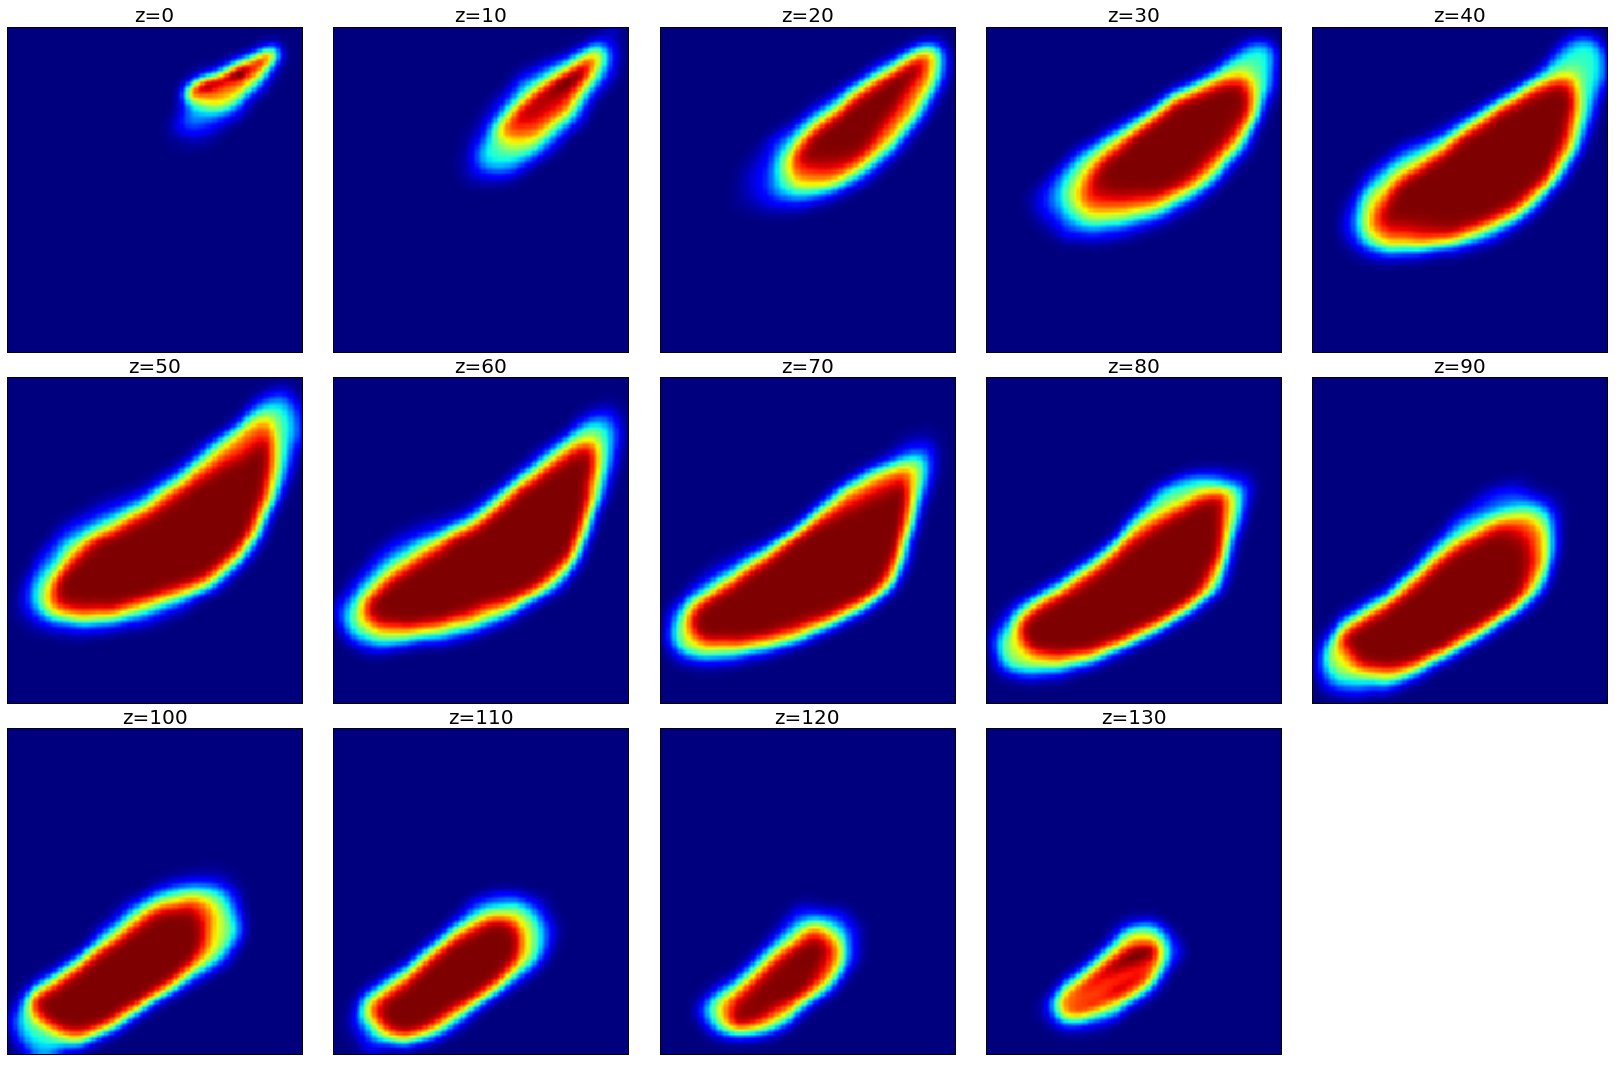

In [20]:
display_volume_sections(volume_moving[global_aligner_parameters['structure_to_label_moving']['SNR_L']][0], 10, start_level=0,
                       title_fontsize=20)

In [71]:
volume_fixed[global_aligner_parameters['structure_to_label_fixed']['SNR_L']][1]

array([    0.,  -426., -2415.])

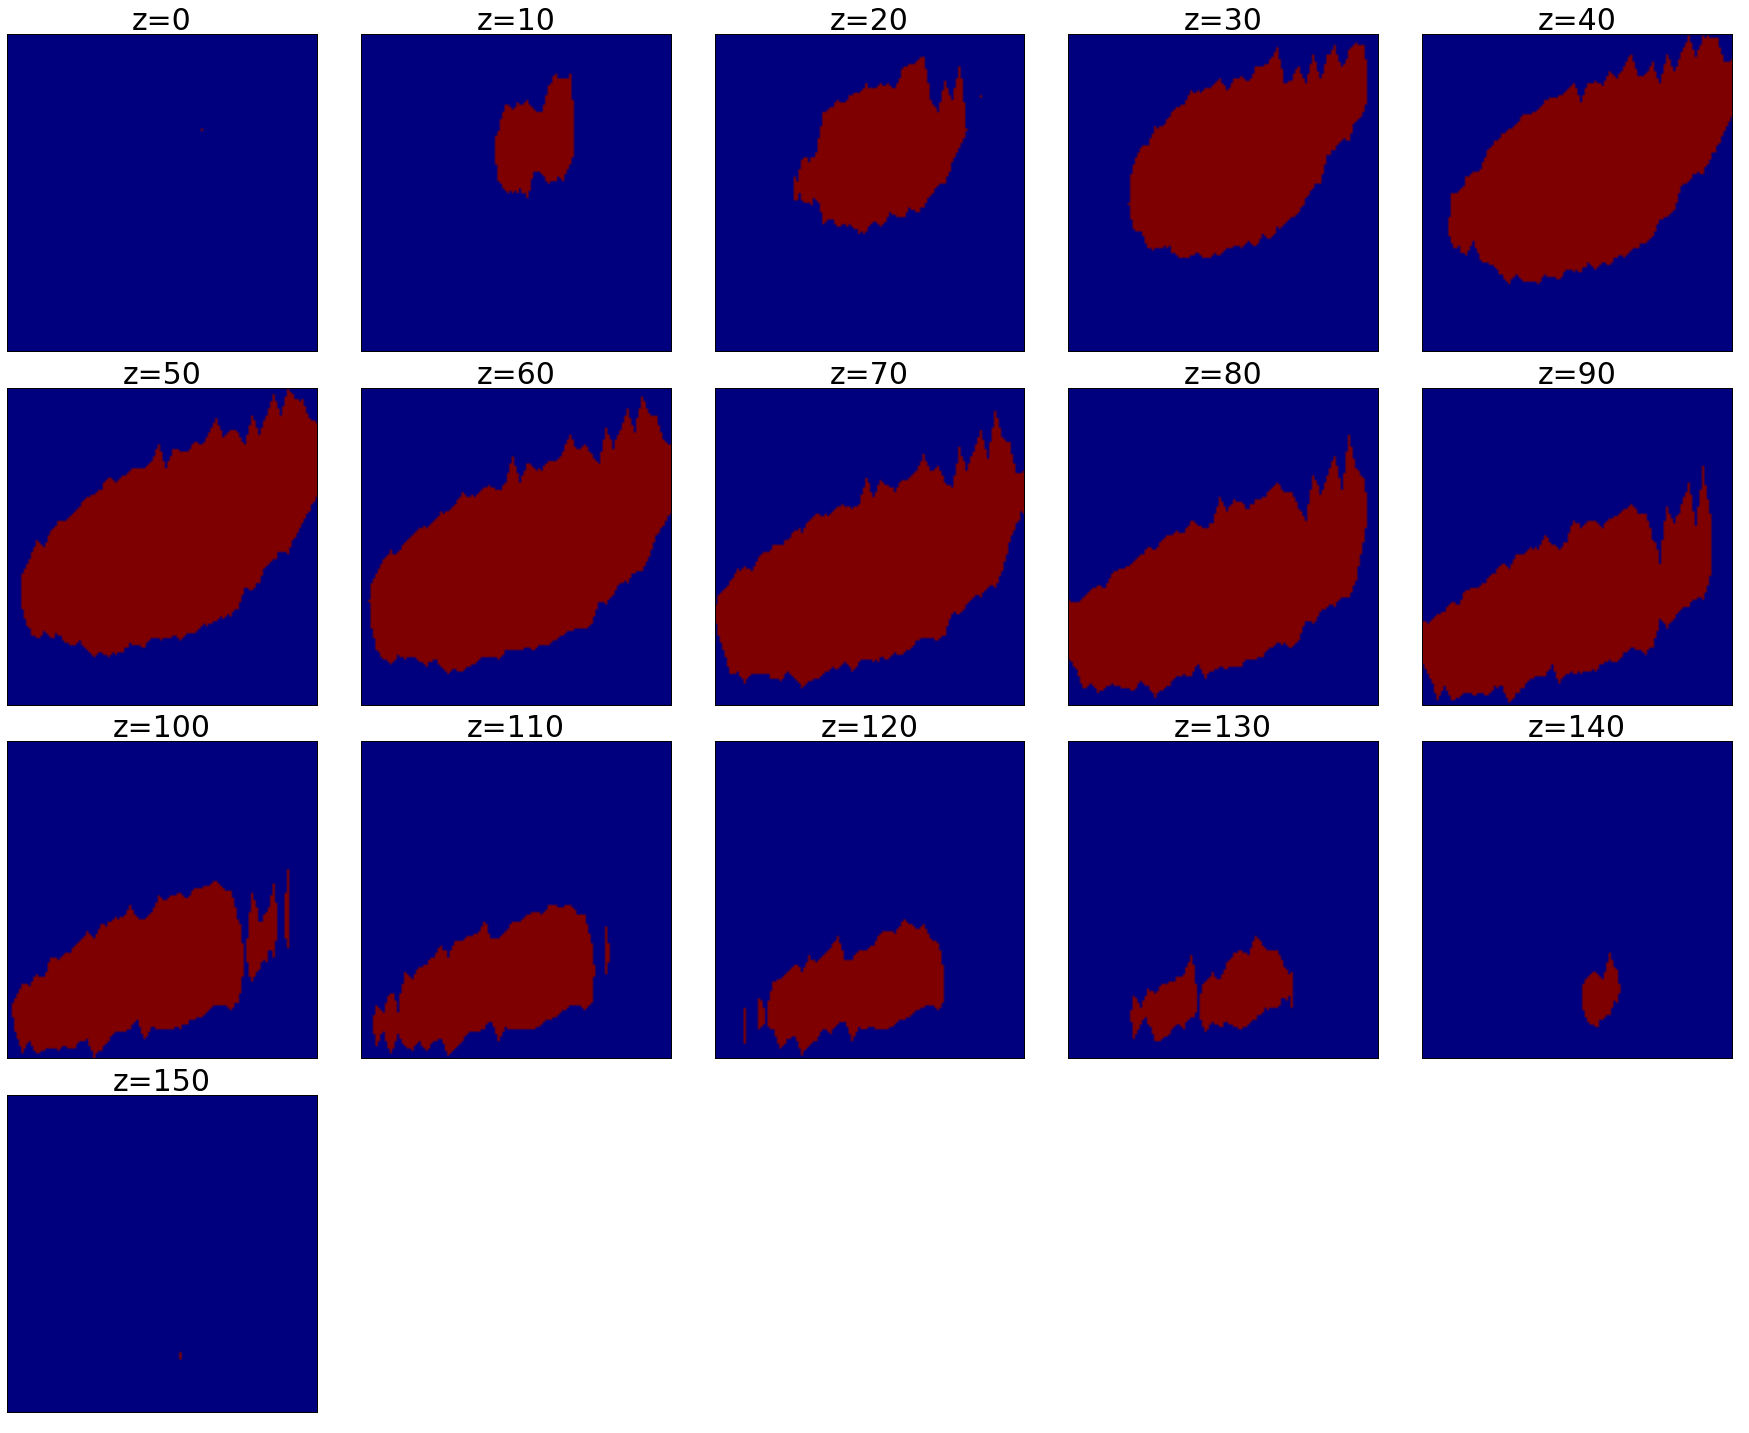

In [21]:
display_volume_sections(volume_fixed[global_aligner_parameters['structure_to_label_fixed']['SNR_L']][0], 10, start_level=0,
                       title_fontsize=30)

In [55]:
aligner = Aligner(global_aligner_parameters['volume_fixed'], 
                  global_aligner_parameters['volume_moving'], 
                  labelIndexMap_m2f=global_aligner_parameters['label_mapping_m2f'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


In [56]:
# aligner.set_centroid(centroid_m='origin', centroid_f='origin')
# aligner.set_centroid(centroid_m='volume_centroid', centroid_f='centroid_m')
# aligner.set_centroid(centroid_m='volume_centroid', centroid_f='volume_centroid')
aligner.set_centroid(centroid_m='structure_centroid', 
                     centroid_f='structure_centroid', 
                     indices_m=[global_aligner_parameters['structure_to_label_moving']['SNR_L']])
# Sometimes initialize with SNR_L centers results in zero gradient. In those cases use another structure.

centroid_m: [-197.10949527  -22.89646235 -136.45576582], centroid_f: [1139.01845134  459.51817766  456.02957956]


In [57]:
aligner.set_label_weights(label_weights=global_aligner_parameters['label_weights_m'])

In [34]:
# # If no any structures overlap after centroid alignment, we need to do grid search to obtain a better initial transform.
# grid_search_T, grid_search_score = aligner.do_grid_search(grid_search_iteration_number=5, 
#                                        grid_search_sample_number=20,
#                     parallel=True, 
#                     std_tx=50, std_ty=50, std_tz=50)

In [35]:
# grid_search_T = np.array([[  1.   ,        0.      ,     0.      ,     5.59385823],
#  [  0.       ,    1.      ,     0.      ,   -19.22999078],
#  [  0.      ,     0.       ,    1.      ,    54.58015557]]).flatten()

In [32]:
# gradients_f = compute_gradient_v2(global_aligner_parameters['volume_fixed'], smooth_first=True)

In [88]:
# # !!!!!!!!! Make sure the frame of these gradients are the same as volume !!!!!!!!!!!!!1

# gradients_f = {}
# for ind_f, struct_f in global_aligner_parameters['label_to_structure_fixed'].iteritems():
#     print struct_f
#     tmpl = DataManager.get_volume_gradient_filepath_template_v3(stack_spec=stack_f_spec, structure=struct_f)
#     for suffix in ['gx','gy','gz']:
#         fp = tmpl % {'suffix': suffix}
#         download_from_s3(fp)
#     gradients_f[ind_f] = np.asarray([bp.unpack_ndarray_file(tmpl % {'suffix': 'gx'}),
#                          bp.unpack_ndarray_file(tmpl % {'suffix': 'gy'}),
#                          bp.unpack_ndarray_file(tmpl % {'suffix': 'gz'})])

In [21]:
# aligner.load_gradient(gradients=gradients_f)

In [51]:
# gradients are computed in `reconstruct/compute_score_volume_gradient_new.ipynb`

gradients = {ind_f: DataManager.load_volume_gradients(stack_spec=brain_f_spec, structure=name_u)
             for name_u, ind_f in global_aligner_parameters['structure_to_label_fixed'].iteritems()
}

In [58]:
aligner.load_gradient(gradients=gradients)

indices_f: set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])


In [20]:
# aligner.compute_gradient(smooth_first=True)

In [38]:
# gradient_filepath_map_f = {ind_f: \
#                            DataManager.get_volume_gradient_filepath_template_v3(\
#                             stack_spec=brain_f_spec, structure=struct_f)
#                 for ind_f, struct_f in global_aligner_parameters['label_to_structure_fixed'].iteritems()}

# aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f)

In [59]:
# Tuning learning rate:
# lr1=10., if lucky converges much faster than lr1=1., but sometimes stuck in local maxima
# If lr1=1., grad_computation_sample_number=1e5 is sufficient.

# trial_num = 1

# T_all_trials = []
# scores_all_trials = []
# traj_all_trials = []

# for _ in range(trial_num):

#     try:
_, _ = aligner.optimize(
    tf_type=global_aligner_parameters['transform_type'], 
#                                 tf_type='rigid', 
                             max_iter_num=1000,
                             history_len=20, 
                             terminate_thresh_rot=.001,
                             terminate_thresh_trans=.1,
                             grad_computation_sample_number=global_aligner_parameters['grad_computation_sample_number'],
#                             grad_computation_sample_number=9999999,
#         grad_computation_sample_number=None,
                             lr1=10, lr2=.1,
#                                     init_T=grid_search_T, 
                                 affine_scaling_limits=(.9, 1.2)
)

5: 389684 valid, 136464 out-of-bound voxels after transform.
10: 228909 valid, 1452418 out-of-bound voxels after transform.
11: 306398 valid, 184092 out-of-bound voxels after transform.
12: 10420593 valid, 4402332 out-of-bound voxels after transform.
13: 5599841 valid, 3468163 out-of-bound voxels after transform.

iteration 0
5: 7443 valid, 2557 out-of-bound voxels after transform.
10: 1344 valid, 8656 out-of-bound voxels after transform.
Error computing score/gradient for 10: Image gradient at all valid voxel is zero.
11: 6281 valid, 3719 out-of-bound voxels after transform.
Error computing score/gradient for 11: Image gradient at all valid voxel is zero.
12: 7061 valid, 2939 out-of-bound voxels after transform.
13: 6185 valid, 3815 out-of-bound voxels after transform.
Norm of gradient = 3.464102
in T: 0.00 0.00 0.00, out T: -10.00 10.00 -10.00
step: 0.60 seconds
current score: -0.006819
new_T: [  0.9  -0.1  -0.1 -10.    0.1   1.1   0.1  10.   -0.1  -0.1   1.1 -10. ]
det: 1.10

iterat

10: 9634 valid, 366 out-of-bound voxels after transform.
12: 9083 valid, 917 out-of-bound voxels after transform.
13: 9781 valid, 219 out-of-bound voxels after transform.
Norm of gradient = 0.938164
in T: -39.41 16.83 16.45, out T: -41.65 19.70 18.58
step: 0.58 seconds
current score: 0.005933
new_T: [  0.9         -0.32844908  -0.44819189 -41.64596397   0.14432234
   0.98103852   0.10453379  19.69912212  -0.25417052  -0.11182431
   0.9         18.57942999]
det: 0.75

iteration 16
10: 9376 valid, 624 out-of-bound voxels after transform.
12: 9122 valid, 878 out-of-bound voxels after transform.
13: 9786 valid, 214 out-of-bound voxels after transform.
Norm of gradient = 0.991744
in T: -41.65 19.70 18.58, out T: -40.90 18.57 18.04
step: 0.57 seconds
current score: 0.005662
new_T: [  0.90817143  -0.30855602  -0.40244561 -40.89815825   0.11619143
   0.96766069   0.05865331  18.57432569  -0.29542086  -0.15898113
   0.9         18.03520365]
det: 0.73

iteration 17
10: 9768 valid, 232 out-of-bou

10: 9803 valid, 197 out-of-bound voxels after transform.
12: 8515 valid, 1485 out-of-bound voxels after transform.
13: 9517 valid, 483 out-of-bound voxels after transform.
Norm of gradient = 1.263833
in T: -52.27 25.87 28.97, out T: -55.96 30.48 27.89
step: 0.56 seconds
current score: 0.005775
new_T: [ 9.00000000e-01 -3.43918471e-01 -3.39204965e-01 -5.59590999e+01
  1.58924281e-01  9.99624718e-01  6.08676380e-03  3.04759323e+01
 -3.16586927e-01 -1.60252390e-01  9.00000000e-01  2.78921218e+01]
det: 0.76

iteration 32
5: 9265 valid, 735 out-of-bound voxels after transform.
10: 8823 valid, 1177 out-of-bound voxels after transform.
12: 8511 valid, 1489 out-of-bound voxels after transform.
13: 9610 valid, 390 out-of-bound voxels after transform.
Norm of gradient = 1.076715
in T: -55.96 30.48 27.89, out T: -53.82 27.36 31.83
step: 0.54 seconds
current score: 0.003507
new_T: [ 9.18276751e-01 -3.06860149e-01 -3.10783508e-01 -5.38173650e+01
  1.20960526e-01  9.58857634e-01 -1.60432340e-02  2.73

13: 9802 valid, 198 out-of-bound voxels after transform.
Norm of gradient = 0.618165
in T: -63.35 33.46 35.56, out T: -62.05 31.67 37.23
step: 0.52 seconds
current score: 0.006370
new_T: [ 9.12679255e-01 -2.85074671e-01 -2.82854235e-01 -6.20540518e+01
  1.14794128e-01  9.43901750e-01 -4.66947272e-02  3.16699829e+01
 -3.33405942e-01 -1.13576733e-01  9.00000000e-01  3.72295426e+01]
det: 0.71

iteration 47
10: 9681 valid, 319 out-of-bound voxels after transform.
12: 8765 valid, 1235 out-of-bound voxels after transform.
13: 9721 valid, 279 out-of-bound voxels after transform.
Norm of gradient = 0.698215
in T: -62.05 31.67 37.23, out T: -64.45 33.97 36.38
step: 0.52 seconds
current score: 0.006772
new_T: [ 9.00000000e-01 -3.03814072e-01 -2.99105958e-01 -6.44466533e+01
  1.36400481e-01  9.65776065e-01 -2.91627672e-02  3.39693211e+01
 -3.49798229e-01 -1.28267937e-01  9.00000000e-01  3.63838962e+01]
det: 0.72

iteration 48
10: 9319 valid, 681 out-of-bound voxels after transform.
12: 8690 valid

10: 9281 valid, 719 out-of-bound voxels after transform.
12: 8663 valid, 1337 out-of-bound voxels after transform.
13: 9674 valid, 326 out-of-bound voxels after transform.
Norm of gradient = 0.445944
in T: -69.14 37.10 42.12, out T: -68.13 35.70 42.87
step: 0.51 seconds
current score: 0.006542
new_T: [  0.91128678  -0.27140876  -0.25740035 -68.13119203   0.1127419
   0.950223    -0.07212105  35.70355522  -0.3572979   -0.10154314
   0.9         42.86708504]
det: 0.71

iteration 63
10: 9666 valid, 334 out-of-bound voxels after transform.
12: 8586 valid, 1414 out-of-bound voxels after transform.
13: 9626 valid, 374 out-of-bound voxels after transform.
Norm of gradient = 0.424719
in T: -68.13 35.70 42.87, out T: -69.51 37.31 42.68
step: 0.51 seconds
current score: 0.006895
new_T: [ 9.00000000e-01 -2.82344806e-01 -2.66645969e-01 -6.95111869e+01
  1.26448603e-01  9.63607336e-01 -5.93968760e-02  3.73136663e+01
 -3.65568611e-01 -1.07296093e-01  9.00000000e-01  4.26784864e+01]
det: 0.71

iterat

10: 9698 valid, 302 out-of-bound voxels after transform.
12: 8526 valid, 1474 out-of-bound voxels after transform.
13: 9628 valid, 372 out-of-bound voxels after transform.
Norm of gradient = 0.395928
in T: -71.81 38.98 48.23, out T: -73.07 40.48 47.96
step: 0.54 seconds
current score: 0.007113
new_T: [  0.9         -0.26886608  -0.24983204 -73.07307838   0.12064523
   0.9607208   -0.07592929  40.47596257  -0.38343953  -0.0976486
   0.9         47.96249052]
det: 0.70

iteration 80
10: 9398 valid, 602 out-of-bound voxels after transform.
12: 8506 valid, 1494 out-of-bound voxels after transform.
13: 9636 valid, 364 out-of-bound voxels after transform.
Norm of gradient = 0.356880
in T: -73.07 40.48 47.96, out T: -72.16 39.44 48.51
step: 0.53 seconds
current score: 0.006760
new_T: [  0.90976164  -0.25754211  -0.23852181 -72.16082311   0.10751266
   0.94830086  -0.08932545  39.43547812  -0.37969741  -0.09121635
   0.9         48.51247537]
det: 0.70

iteration 81
10: 9679 valid, 321 out-of-bo

10: 9469 valid, 531 out-of-bound voxels after transform.
12: 8571 valid, 1429 out-of-bound voxels after transform.
13: 9627 valid, 373 out-of-bound voxels after transform.
Norm of gradient = 0.289293
in T: -75.60 42.80 52.51, out T: -74.96 41.86 52.67
step: 0.53 seconds
current score: 0.006950
new_T: [  0.90807356  -0.25050542  -0.22756062 -74.9573228    0.10494049
   0.94580873  -0.09973528  41.85993592  -0.39615471  -0.08240721
   0.9         52.67279625]
det: 0.70

iteration 97
10: 9668 valid, 332 out-of-bound voxels after transform.
12: 8519 valid, 1481 out-of-bound voxels after transform.
13: 9608 valid, 392 out-of-bound voxels after transform.
Norm of gradient = 0.291348
in T: -74.96 41.86 52.67, out T: -75.86 42.97 52.92
step: 0.54 seconds
current score: 0.007275
new_T: [  0.9         -0.25666034  -0.23594622 -75.86302851   0.11498825
   0.95535779  -0.08984912  42.96500694  -0.3983098   -0.08391364
   0.9         52.91821292]
det: 0.70

iteration 98
10: 9444 valid, 556 out-of-b

10: 9663 valid, 337 out-of-bound voxels after transform.
12: 8547 valid, 1453 out-of-bound voxels after transform.
13: 9623 valid, 377 out-of-bound voxels after transform.
Norm of gradient = 0.279236
in T: -77.12 43.55 55.04, out T: -78.09 44.50 55.63
step: 0.56 seconds
current score: 0.007399
new_T: [ 9.00000000e-01 -2.47882352e-01 -2.30204650e-01 -7.80895770e+01
  1.13087071e-01  9.50962417e-01 -9.59406772e-02  4.45012374e+01
 -4.05066497e-01 -7.05359761e-02  9.00000000e-01  5.56314764e+01]
det: 0.69

iteration 114
10: 9499 valid, 501 out-of-bound voxels after transform.
12: 8660 valid, 1340 out-of-bound voxels after transform.
13: 9661 valid, 339 out-of-bound voxels after transform.
Norm of gradient = 0.274359
in T: -78.09 44.50 55.63, out T: -77.52 43.72 55.38
step: 0.51 seconds
current score: 0.007232
new_T: [ 9.07297358e-01 -2.40088925e-01 -2.21070639e-01 -7.75178581e+01
  1.03943570e-01  9.41640607e-01 -1.05732258e-01  4.37163130e+01
 -4.10393553e-01 -7.47941691e-02  9.00000000e

10: 9652 valid, 348 out-of-bound voxels after transform.
12: 8538 valid, 1462 out-of-bound voxels after transform.
13: 9631 valid, 369 out-of-bound voxels after transform.
Norm of gradient = 0.233597
in T: -79.28 45.08 57.00, out T: -80.12 45.87 57.25
step: 0.53 seconds
current score: 0.007352
new_T: [ 9.00000000e-01 -2.34978461e-01 -2.22910168e-01 -8.01241182e+01
  1.09946980e-01  9.44709759e-01 -1.02574327e-01  4.58671653e+01
 -4.08953632e-01 -7.13348023e-02  9.00000000e-01  5.72518469e+01]
det: 0.69

iteration 130
10: 9543 valid, 457 out-of-bound voxels after transform.
12: 8532 valid, 1468 out-of-bound voxels after transform.
13: 9676 valid, 324 out-of-bound voxels after transform.
Norm of gradient = 0.209641
in T: -80.12 45.87 57.25, out T: -79.68 45.27 57.20
step: 0.52 seconds
current score: 0.007279
new_T: [ 9.05414297e-01 -2.27751946e-01 -2.17043134e-01 -7.96830126e+01
  1.03128815e-01  9.37906954e-01 -1.10038190e-01  4.52711808e+01
 -4.11984399e-01 -7.26249443e-02  9.00000000e

10: 9666 valid, 334 out-of-bound voxels after transform.
12: 8578 valid, 1422 out-of-bound voxels after transform.
13: 9643 valid, 357 out-of-bound voxels after transform.
Norm of gradient = 0.244791
in T: -81.02 46.23 58.11, out T: -81.88 47.04 58.49
step: 0.53 seconds
current score: 0.007573
new_T: [ 9.00000000e-01 -2.26094560e-01 -2.17782955e-01 -8.18786692e+01
  1.09168774e-01  9.42330291e-01 -1.06445450e-01  4.70353936e+01
 -4.13535040e-01 -6.62426844e-02  9.00000000e-01  5.84934173e+01]
det: 0.69

iteration 146
10: 9545 valid, 455 out-of-bound voxels after transform.
12: 8589 valid, 1411 out-of-bound voxels after transform.
13: 9650 valid, 350 out-of-bound voxels after transform.
Norm of gradient = 0.239996
in T: -81.88 47.04 58.49, out T: -81.34 46.32 58.34
step: 0.53 seconds
current score: 0.007340
new_T: [ 9.06932330e-01 -2.19533393e-01 -2.10551439e-01 -8.13422143e+01
  1.00966736e-01  9.34912992e-01 -1.15201594e-01  4.63162160e+01
 -4.16937647e-01 -7.07763008e-02  9.00000000e

10: 9621 valid, 379 out-of-bound voxels after transform.
12: 8403 valid, 1597 out-of-bound voxels after transform.
13: 9613 valid, 387 out-of-bound voxels after transform.
Norm of gradient = 0.155688
in T: -82.90 47.14 59.17, out T: -83.38 47.64 59.47
step: 0.53 seconds
current score: 0.007312
new_T: [ 9.00000000e-01 -2.16094310e-01 -2.10518986e-01 -8.33834227e+01
  1.05094889e-01  9.41388799e-01 -1.11868281e-01  4.76386430e+01
 -4.15563060e-01 -7.14107937e-02  9.00000000e-01  5.94713740e+01]
det: 0.68

iteration 162
10: 9549 valid, 451 out-of-bound voxels after transform.
12: 8553 valid, 1447 out-of-bound voxels after transform.
13: 9654 valid, 346 out-of-bound voxels after transform.
Norm of gradient = 0.168571
in T: -83.38 47.64 59.47, out T: -83.08 47.19 59.30
step: 0.53 seconds
current score: 0.007330
new_T: [ 9.04045563e-01 -2.10830175e-01 -2.05872772e-01 -8.30821736e+01
  9.97748103e-02  9.36078539e-01 -1.17766296e-01  4.71927709e+01
 -4.18106927e-01 -7.35516676e-02  9.00000000e

10: 9643 valid, 357 out-of-bound voxels after transform.
12: 8457 valid, 1543 out-of-bound voxels after transform.
13: 9549 valid, 451 out-of-bound voxels after transform.
Norm of gradient = 0.200791
in T: -84.19 47.85 60.19, out T: -84.78 48.40 60.89
step: 0.51 seconds
current score: 0.007372
new_T: [ 9.00000000e-01 -2.02770482e-01 -2.09976555e-01 -8.47803515e+01
  1.03199675e-01  9.42213199e-01 -1.13646235e-01  4.83961593e+01
 -4.12792991e-01 -7.58762197e-02  9.00000000e-01  6.08868042e+01]
det: 0.68

iteration 178
10: 9580 valid, 420 out-of-bound voxels after transform.
12: 8430 valid, 1570 out-of-bound voxels after transform.
13: 9584 valid, 416 out-of-bound voxels after transform.
Norm of gradient = 0.205996
in T: -84.78 48.40 60.89, out T: -84.51 47.94 60.17
step: 0.51 seconds
current score: 0.007302
new_T: [ 9.04189438e-01 -1.97868587e-01 -2.05766135e-01 -8.45130267e+01
  9.81023258e-02  9.37527855e-01 -1.19267524e-01  4.79356123e+01
 -4.21530645e-01 -8.26840599e-02  9.00000000e

13: 9494 valid, 506 out-of-bound voxels after transform.
Norm of gradient = 0.197754
in T: -85.93 48.35 60.59, out T: -86.56 48.91 61.32
step: 0.51 seconds
current score: 0.007290
new_T: [  0.9         -0.18719397  -0.21219323 -86.55592498   0.10171942
   0.94712063  -0.11629659  48.91075836  -0.41214519  -0.08674863
   0.9         61.32174727]
det: 0.69

iteration 194
10: 9537 valid, 463 out-of-bound voxels after transform.
12: 8337 valid, 1663 out-of-bound voxels after transform.
13: 9530 valid, 470 out-of-bound voxels after transform.
Norm of gradient = 0.215530
in T: -86.56 48.91 61.32, out T: -86.19 48.36 60.69
step: 0.51 seconds
current score: 0.006997
new_T: [  0.90487218  -0.18094389  -0.20745125 -86.18603254   0.09605898
   0.94240546  -0.12276339  48.35863909  -0.42017901  -0.09434287
   0.9         60.69167798]
det: 0.68

iteration 195
10: 9653 valid, 347 out-of-bound voxels after transform.
12: 8305 valid, 1695 out-of-bound voxels after transform.
13: 9470 valid, 530 out-of

13: 9377 valid, 623 out-of-bound voxels after transform.
Norm of gradient = 0.119533
in T: -89.01 49.19 61.17, out T: -88.92 48.88 61.29
step: 0.54 seconds
current score: 0.006903
new_T: [  0.90288316  -0.15492035  -0.21573224 -88.92484863   0.09341827
   0.95052943  -0.12477367  48.87995333  -0.41383617  -0.10606829
   0.9         61.28965   ]
det: 0.68

iteration 211
10: 9654 valid, 346 out-of-bound voxels after transform.
12: 8207 valid, 1793 out-of-bound voxels after transform.
13: 9304 valid, 696 out-of-bound voxels after transform.
Norm of gradient = 0.134826
in T: -88.92 48.88 61.29, out T: -89.42 49.29 61.60
step: 0.53 seconds
current score: 0.006946
new_T: [  0.9         -0.15512037  -0.21931514 -89.4186838    0.09678852
   0.95477319  -0.12137495  49.28577575  -0.41035515  -0.10385437
   0.9         61.60277094]
det: 0.68

iteration 212
10: 9577 valid, 423 out-of-bound voxels after transform.
12: 8115 valid, 1885 out-of-bound voxels after transform.
13: 9333 valid, 667 out-of

10: 9619 valid, 381 out-of-bound voxels after transform.
12: 7989 valid, 2011 out-of-bound voxels after transform.
13: 9222 valid, 778 out-of-bound voxels after transform.
Norm of gradient = 0.111839
in T: -93.54 49.12 61.37, out T: -94.06 49.32 61.18
step: 0.54 seconds
current score: 0.006849
new_T: [ 9.00000000e-01 -9.26137569e-02 -2.38799562e-01 -9.40625439e+01
  9.28707242e-02  9.65217686e-01 -1.30199680e-01  4.93209481e+01
 -4.13022159e-01 -1.08419881e-01  9.00000000e-01  6.11849606e+01]
det: 0.68

iteration 228
10: 9584 valid, 416 out-of-bound voxels after transform.
12: 8075 valid, 1925 out-of-bound voxels after transform.
13: 9204 valid, 796 out-of-bound voxels after transform.
Norm of gradient = 0.101950
in T: -94.06 49.32 61.18, out T: -94.38 49.19 61.26
step: 0.53 seconds
current score: 0.006812
new_T: [ 9.00000000e-01 -8.68442383e-02 -2.39322049e-01 -9.43823237e+01
  9.14676387e-02  9.64668089e-01 -1.32187727e-01  4.91855355e+01
 -4.13006638e-01 -1.10313758e-01  9.00000000e

10: 9574 valid, 426 out-of-bound voxels after transform.
12: 7974 valid, 2026 out-of-bound voxels after transform.
13: 9056 valid, 944 out-of-bound voxels after transform.
Norm of gradient = 0.089232
in T: -99.70 49.99 62.33, out T: -100.01 50.04 62.34
step: 0.54 seconds
current score: 0.006824
new_T: [ 9.00000000e-01 -3.04895942e-02 -2.48530297e-01 -1.00006129e+02
  9.14121931e-02  9.65645868e-01 -1.42826177e-01  5.00394082e+01
 -4.12185139e-01 -1.18946411e-01  9.00000000e-01  6.23435954e+01]
det: 0.67

iteration 244
10: 9605 valid, 395 out-of-bound voxels after transform.
12: 7911 valid, 2089 out-of-bound voxels after transform.
13: 9146 valid, 854 out-of-bound voxels after transform.
Norm of gradient = 0.087846
in T: -100.01 50.04 62.34, out T: -100.42 50.15 62.42
step: 0.55 seconds
current score: 0.006865
new_T: [ 9.00000000e-01 -2.86889438e-02 -2.48522921e-01 -1.00422811e+02
  9.15668496e-02  9.65614072e-01 -1.43739404e-01  5.01529141e+01
 -4.11599202e-01 -1.21005183e-01  9.000000

10: 9616 valid, 384 out-of-bound voxels after transform.
12: 7686 valid, 2314 out-of-bound voxels after transform.
13: 8880 valid, 1120 out-of-bound voxels after transform.
Norm of gradient = 0.089416
in T: -104.84 51.35 64.65, out T: -105.06 51.37 64.64
step: 0.52 seconds
current score: 0.006648
new_T: [ 9.01002575e-01 -3.81602418e-03 -2.33595820e-01 -1.05056639e+02
  8.84691843e-02  9.64081294e-01 -1.49287791e-01  5.13665565e+01
 -4.09534556e-01 -1.56273937e-01  9.00000000e-01  6.46426668e+01]
det: 0.67

iteration 260
10: 9561 valid, 439 out-of-bound voxels after transform.
12: 7594 valid, 2406 out-of-bound voxels after transform.
13: 8836 valid, 1164 out-of-bound voxels after transform.
Norm of gradient = 0.111487
in T: -105.06 51.37 64.64, out T: -105.54 51.63 65.22
step: 0.52 seconds
current score: 0.006357
new_T: [ 9.00000000e-01 -3.81789229e-03 -2.34968684e-01 -1.05543694e+02
  8.98611143e-02  9.65427096e-01 -1.47289769e-01  5.16268425e+01
 -4.04708495e-01 -1.56089224e-01  9.000

10: 9577 valid, 423 out-of-bound voxels after transform.
12: 7192 valid, 2808 out-of-bound voxels after transform.
13: 8385 valid, 1615 out-of-bound voxels after transform.
Norm of gradient = 0.112740
in T: -110.59 53.24 67.76, out T: -110.71 53.08 68.33
step: 0.51 seconds
current score: 0.005592
new_T: [ 9.07593802e-01  1.43917848e-02 -2.24506364e-01 -1.10711981e+02
  8.23354831e-02  9.62753728e-01 -1.49267463e-01  5.30806554e+01
 -3.95850293e-01 -2.04733178e-01  9.00000000e-01  6.83301075e+01]
det: 0.68

iteration 276
10: 9642 valid, 358 out-of-bound voxels after transform.
12: 7368 valid, 2632 out-of-bound voxels after transform.
13: 8412 valid, 1588 out-of-bound voxels after transform.
Norm of gradient = 0.140889
in T: -110.71 53.08 68.33, out T: -111.29 53.56 68.20
step: 0.51 seconds
current score: 0.005889
new_T: [ 9.05133383e-01  1.18688768e-02 -2.26154382e-01 -1.11289009e+02
  8.51821004e-02  9.65977711e-01 -1.45784713e-01  5.35570243e+01
 -3.99251404e-01 -2.11951379e-01  9.000

10: 9632 valid, 368 out-of-bound voxels after transform.
12: 6679 valid, 3321 out-of-bound voxels after transform.
13: 7894 valid, 2106 out-of-bound voxels after transform.
Norm of gradient = 0.096377
in T: -115.61 55.60 74.29, out T: -116.00 55.89 74.69
step: 0.55 seconds
current score: 0.004838
new_T: [ 9.15035110e-01  2.87820650e-02 -2.20934330e-01 -1.15998181e+02
  7.91927040e-02  9.64376704e-01 -1.45319075e-01  5.58917984e+01
 -3.90194780e-01 -2.59806750e-01  9.00000000e-01  7.46928711e+01]
det: 0.68

iteration 292
10: 9597 valid, 403 out-of-bound voxels after transform.
12: 6729 valid, 3271 out-of-bound voxels after transform.
13: 7824 valid, 2176 out-of-bound voxels after transform.
Norm of gradient = 0.082979
in T: -116.00 55.89 74.69, out T: -116.25 55.99 75.03
step: 0.53 seconds
current score: 0.004732
new_T: [ 9.16402275e-01  3.03555200e-02 -2.20344562e-01 -1.16253667e+02
  7.80193207e-02  9.63362215e-01 -1.46648800e-01  5.59897122e+01
 -3.91959965e-01 -2.63750893e-01  9.000

10: 9594 valid, 406 out-of-bound voxels after transform.
12: 6222 valid, 3778 out-of-bound voxels after transform.
13: 7368 valid, 2632 out-of-bound voxels after transform.
Norm of gradient = 0.084928
in T: -120.43 58.94 81.37, out T: -120.72 59.21 81.39
step: 0.54 seconds
current score: 0.003894
new_T: [ 9.23446383e-01  4.44676188e-02 -2.18022795e-01 -1.20715692e+02
  7.42900027e-02  9.57804728e-01 -1.52182636e-01  5.92066950e+01
 -3.92195446e-01 -3.05655555e-01  9.00000000e-01  8.13854543e+01]
det: 0.68

iteration 308
10: 9587 valid, 413 out-of-bound voxels after transform.
12: 6162 valid, 3838 out-of-bound voxels after transform.
13: 7404 valid, 2596 out-of-bound voxels after transform.
Norm of gradient = 0.097980
in T: -120.72 59.21 81.39, out T: -120.95 59.31 82.09
step: 0.52 seconds
current score: 0.003861
new_T: [ 9.24289089e-01  4.58036852e-02 -2.17364951e-01 -1.20948321e+02
  7.34947451e-02  9.57558921e-01 -1.53842784e-01  5.93075585e+01
 -3.88639794e-01 -3.06331298e-01  9.000

10: 9599 valid, 401 out-of-bound voxels after transform.
12: 5917 valid, 4083 out-of-bound voxels after transform.
13: 7187 valid, 2813 out-of-bound voxels after transform.
Norm of gradient = 0.065493
in T: -124.39 61.96 86.08, out T: -124.57 62.10 86.13
step: 0.50 seconds
current score: 0.003622
new_T: [ 9.31065102e-01  5.81714461e-02 -2.19001782e-01 -1.24565643e+02
  7.10639058e-02  9.51643876e-01 -1.63815334e-01  6.21013660e+01
 -3.94624080e-01 -3.25594855e-01  9.00000000e-01  8.61315609e+01]
det: 0.67

iteration 324
10: 9565 valid, 435 out-of-bound voxels after transform.
12: 5927 valid, 4073 out-of-bound voxels after transform.
13: 7127 valid, 2873 out-of-bound voxels after transform.
Norm of gradient = 0.067514
in T: -124.57 62.10 86.13, out T: -124.75 62.24 86.15
step: 0.51 seconds
current score: 0.003408
new_T: [ 9.31091563e-01  5.77336209e-02 -2.18309767e-01 -1.24750327e+02
  7.09404546e-02  9.51521419e-01 -1.64622766e-01  6.22390918e+01
 -3.95596695e-01 -3.25879038e-01  9.000

10: 9536 valid, 464 out-of-bound voxels after transform.
12: 5799 valid, 4201 out-of-bound voxels after transform.
13: 7097 valid, 2903 out-of-bound voxels after transform.
Norm of gradient = 0.075705
in T: -127.14 64.13 87.95, out T: -127.18 64.13 87.76
step: 0.51 seconds
current score: 0.003363
new_T: [ 9.38348271e-01  6.12235186e-02 -2.15210334e-01 -1.27182914e+02
  6.91350033e-02  9.48194492e-01 -1.74522865e-01  6.41321142e+01
 -4.02571404e-01 -3.22481770e-01  9.00000000e-01  8.77646562e+01]
det: 0.67

iteration 340
10: 9557 valid, 443 out-of-bound voxels after transform.
12: 5903 valid, 4097 out-of-bound voxels after transform.
13: 7015 valid, 2985 out-of-bound voxels after transform.
Norm of gradient = 0.083080
in T: -127.18 64.13 87.76, out T: -127.42 64.47 87.96
step: 0.51 seconds
current score: 0.003291
new_T: [ 9.37680096e-01  5.99805356e-02 -2.16215267e-01 -1.27416301e+02
  7.09339849e-02  9.49581694e-01 -1.73007317e-01  6.44743069e+01
 -4.01357213e-01 -3.20517941e-01  9.000

10: 9564 valid, 436 out-of-bound voxels after transform.
12: 5895 valid, 4105 out-of-bound voxels after transform.
13: 7177 valid, 2823 out-of-bound voxels after transform.
Norm of gradient = 0.072164
in T: -129.33 65.56 88.99, out T: -129.31 65.48 89.10
step: 0.53 seconds
current score: 0.003528
new_T: [ 9.44939652e-01  6.07368293e-02 -2.14657491e-01 -1.29305959e+02
  6.73048982e-02  9.48265367e-01 -1.80470345e-01  6.54812892e+01
 -4.06416434e-01 -3.17760253e-01  9.00000000e-01  8.91032079e+01]
det: 0.67

iteration 356
10: 9570 valid, 430 out-of-bound voxels after transform.
12: 5898 valid, 4102 out-of-bound voxels after transform.
13: 7084 valid, 2916 out-of-bound voxels after transform.
Norm of gradient = 0.084493
in T: -129.31 65.48 89.10, out T: -129.59 65.77 89.15
step: 0.52 seconds
current score: 0.003495
new_T: [ 9.43319985e-01  5.85329687e-02 -2.16160801e-01 -1.29586506e+02
  6.90743233e-02  9.50007069e-01 -1.79039918e-01  6.57654984e+01
 -4.07659328e-01 -3.19140535e-01  9.000

10: 9519 valid, 481 out-of-bound voxels after transform.
12: 5785 valid, 4215 out-of-bound voxels after transform.
13: 7133 valid, 2867 out-of-bound voxels after transform.
Norm of gradient = 0.138382
in T: -131.26 66.78 90.35, out T: -130.96 66.32 90.41
step: 0.61 seconds
current score: 0.003381
new_T: [ 9.51572922e-01  5.86572907e-02 -2.16197748e-01 -1.30959523e+02
  6.38374775e-02  9.46881553e-01 -1.87137888e-01  6.63190189e+01
 -4.08175360e-01 -3.18788498e-01  9.00000000e-01  9.04073776e+01]
det: 0.68

iteration 372
10: 9555 valid, 445 out-of-bound voxels after transform.
12: 5728 valid, 4272 out-of-bound voxels after transform.
13: 7084 valid, 2916 out-of-bound voxels after transform.
Norm of gradient = 0.139996
in T: -130.96 66.32 90.41, out T: -131.43 66.88 90.49
step: 0.54 seconds
current score: 0.003295
new_T: [ 9.47598413e-01  5.55322439e-02 -2.20345238e-01 -1.31426588e+02
  6.84529283e-02  9.51125296e-01 -1.82664639e-01  6.68778042e+01
 -4.09321818e-01 -3.16802627e-01  9.000

10: 9547 valid, 453 out-of-bound voxels after transform.
12: 5775 valid, 4225 out-of-bound voxels after transform.
13: 7176 valid, 2824 out-of-bound voxels after transform.
Norm of gradient = 0.069018
in T: -132.69 67.58 91.43, out T: -132.70 67.56 91.34
step: 0.53 seconds
current score: 0.003546
new_T: [ 9.54916244e-01  5.27275692e-02 -2.21386432e-01 -1.32695181e+02
  6.34408524e-02  9.50262331e-01 -1.89205679e-01  6.75552530e+01
 -4.12342592e-01 -3.13771336e-01  9.00000000e-01  9.13350177e+01]
det: 0.68

iteration 388
10: 9559 valid, 441 out-of-bound voxels after transform.
12: 5844 valid, 4156 out-of-bound voxels after transform.
13: 7163 valid, 2837 out-of-bound voxels after transform.
Norm of gradient = 0.062226
in T: -132.70 67.56 91.34, out T: -132.81 67.68 91.39
step: 0.53 seconds
current score: 0.003548
new_T: [ 9.54704815e-01  5.22419812e-02 -2.22324503e-01 -1.32808367e+02
  6.41739634e-02  9.51010978e-01 -1.88819631e-01  6.76804088e+01
 -4.13615333e-01 -3.14200488e-01  9.000

10: 9514 valid, 486 out-of-bound voxels after transform.
12: 5818 valid, 4182 out-of-bound voxels after transform.
13: 7099 valid, 2901 out-of-bound voxels after transform.
Norm of gradient = 0.065092
in T: -133.96 68.48 91.89, out T: -133.98 68.49 91.97
step: 0.52 seconds
current score: 0.003514
new_T: [ 9.59982801e-01  4.82213917e-02 -2.25498345e-01 -1.33975101e+02
  6.16487043e-02  9.53456351e-01 -1.92096955e-01  6.84928326e+01
 -4.13134734e-01 -3.14228925e-01  9.00000000e-01  9.19712234e+01]
det: 0.68

iteration 404
10: 9561 valid, 439 out-of-bound voxels after transform.
12: 5782 valid, 4218 out-of-bound voxels after transform.
13: 7304 valid, 2696 out-of-bound voxels after transform.
Norm of gradient = 0.057771
in T: -133.98 68.49 91.97, out T: -134.04 68.49 91.97
step: 0.52 seconds
current score: 0.003728
new_T: [ 9.60318561e-01  4.87601353e-02 -2.25682155e-01 -1.34041443e+02
  6.12884913e-02  9.53198093e-01 -1.92377226e-01  6.84886991e+01
 -4.12362910e-01 -3.14563516e-01  9.000

10: 9569 valid, 431 out-of-bound voxels after transform.
12: 5793 valid, 4207 out-of-bound voxels after transform.
13: 7072 valid, 2928 out-of-bound voxels after transform.
Norm of gradient = 0.082711
in T: -135.64 69.40 92.00, out T: -135.89 69.63 92.22
step: 0.51 seconds
current score: 0.003441
new_T: [ 9.66722158e-01  3.58655913e-02 -2.33854058e-01 -1.35889032e+02
  5.79232784e-02  9.59302087e-01 -1.92803609e-01  6.96288533e+01
 -4.12887997e-01 -3.13746704e-01  9.00000000e-01  9.22249681e+01]
det: 0.69

iteration 420
10: 9509 valid, 491 out-of-bound voxels after transform.
12: 5747 valid, 4253 out-of-bound voxels after transform.
13: 7083 valid, 2917 out-of-bound voxels after transform.
Norm of gradient = 0.068411
in T: -135.89 69.63 92.22, out T: -135.92 69.55 92.21
step: 0.51 seconds
current score: 0.003430
new_T: [ 9.68552894e-01  3.63189394e-02 -2.32745839e-01 -1.35921875e+02
  5.62202005e-02  9.58292327e-01 -1.94284420e-01  6.95488341e+01
 -4.13259841e-01 -3.13569097e-01  9.000

10: 9582 valid, 418 out-of-bound voxels after transform.
12: 5784 valid, 4216 out-of-bound voxels after transform.
13: 7080 valid, 2920 out-of-bound voxels after transform.
Norm of gradient = 0.071805
in T: -138.65 71.11 90.81, out T: -138.88 71.30 90.69
step: 0.51 seconds
current score: 0.003586
new_T: [ 9.77488505e-01  1.98556909e-02 -2.44097970e-01 -1.38875001e+02
  4.95816381e-02  9.67393772e-01 -1.94547023e-01  7.12987140e+01
 -4.07389938e-01 -3.21481453e-01  9.00000000e-01  9.06906200e+01]
det: 0.70

iteration 436
10: 9596 valid, 404 out-of-bound voxels after transform.
12: 5783 valid, 4217 out-of-bound voxels after transform.
13: 6926 valid, 3074 out-of-bound voxels after transform.
Norm of gradient = 0.075739
in T: -138.88 71.30 90.69, out T: -139.10 71.43 90.69
step: 0.52 seconds
current score: 0.003547
new_T: [ 9.78635863e-01  1.77283773e-02 -2.44628461e-01 -1.39096789e+02
  4.87786604e-02  9.68145579e-01 -1.94401955e-01  7.14322058e+01
 -4.04617829e-01 -3.21345301e-01  9.000

10: 9535 valid, 465 out-of-bound voxels after transform.
12: 5782 valid, 4218 out-of-bound voxels after transform.
13: 6856 valid, 3144 out-of-bound voxels after transform.
Norm of gradient = 0.094636
in T: -142.89 74.13 84.48, out T: -143.25 74.38 84.36
step: 0.51 seconds
current score: 0.003583
new_T: [ 9.93734960e-01  2.56127889e-03 -2.43959085e-01 -1.43245749e+02
  3.73389291e-02  9.83327414e-01 -1.88281553e-01  7.43813634e+01
 -3.81409295e-01 -3.53049835e-01  9.00000000e-01  8.43556980e+01]
det: 0.73

iteration 452
10: 9557 valid, 443 out-of-bound voxels after transform.
12: 5734 valid, 4266 out-of-bound voxels after transform.
13: 6841 valid, 3159 out-of-bound voxels after transform.
Norm of gradient = 0.095472
in T: -143.25 74.38 84.36, out T: -143.54 74.66 83.90
step: 0.52 seconds
current score: 0.003588
new_T: [ 9.94132800e-01  2.03056459e-03 -2.43097659e-01 -1.43536208e+02
  3.65303148e-02  9.85440279e-01 -1.87364507e-01  7.46580255e+01
 -3.79556112e-01 -3.55225912e-01  9.000

10: 9509 valid, 491 out-of-bound voxels after transform.
12: 5769 valid, 4231 out-of-bound voxels after transform.
13: 6839 valid, 3161 out-of-bound voxels after transform.
Norm of gradient = 0.081817
in T: -146.34 78.38 78.23, out T: -146.29 78.57 78.07
step: 0.53 seconds
current score: 0.003984
new_T: [ 1.00037675e+00  1.27142272e-02 -2.19232717e-01 -1.46294228e+02
  1.70580076e-02  1.01614446e+00 -1.62888734e-01  7.85692313e+01
 -3.60454537e-01 -3.68803075e-01  9.00000000e-01  7.80731819e+01]
det: 0.78

iteration 468
10: 9520 valid, 480 out-of-bound voxels after transform.
12: 5774 valid, 4226 out-of-bound voxels after transform.
13: 6863 valid, 3137 out-of-bound voxels after transform.
Norm of gradient = 0.085195
in T: -146.29 78.57 78.07, out T: -146.57 78.89 77.81
step: 0.53 seconds
current score: 0.003897
new_T: [ 9.99320343e-01  1.27515044e-02 -2.18448672e-01 -1.46569030e+02
  1.62786367e-02  1.01871001e+00 -1.60290912e-01  7.88856619e+01
 -3.59088117e-01 -3.69736319e-01  9.000

10: 9537 valid, 463 out-of-bound voxels after transform.
12: 5853 valid, 4147 out-of-bound voxels after transform.
13: 6794 valid, 3206 out-of-bound voxels after transform.
Norm of gradient = 0.062260
in T: -147.52 81.72 74.71, out T: -147.54 81.94 74.77
step: 0.51 seconds
current score: 0.004242
new_T: [ 9.95639251e-01  2.19921762e-02 -1.90025299e-01 -1.47539078e+02
 -2.71382212e-03  1.03708500e+00 -1.33718161e-01  8.19375257e+01
 -3.47721476e-01 -3.65766640e-01  9.00000000e-01  7.47703139e+01]
det: 0.81

iteration 484
10: 9551 valid, 449 out-of-bound voxels after transform.
12: 5798 valid, 4202 out-of-bound voxels after transform.
13: 6832 valid, 3168 out-of-bound voxels after transform.
Norm of gradient = 0.064402
in T: -147.54 81.94 74.77, out T: -147.51 82.01 74.58
step: 0.50 seconds
current score: 0.004342
new_T: [ 9.95506749e-01  2.28253222e-02 -1.87997987e-01 -1.47506405e+02
 -4.25439899e-03  1.03620663e+00 -1.33231974e-01  8.20083613e+01
 -3.49724747e-01 -3.66145186e-01  9.000

10: 9621 valid, 379 out-of-bound voxels after transform.
12: 5967 valid, 4033 out-of-bound voxels after transform.
13: 6773 valid, 3227 out-of-bound voxels after transform.
Norm of gradient = 0.381437
in T: -147.27 82.77 73.35, out T: -148.48 84.14 72.51
step: 0.60 seconds
current score: 0.004207
new_T: [ 9.81914441e-01  2.06665354e-02 -1.76852390e-01 -1.48478303e+02
 -6.25169826e-03  1.04049655e+00 -1.14176179e-01  8.41401673e+01
 -3.46752836e-01 -3.72314772e-01  9.00000000e-01  7.25088536e+01]
det: 0.81

iteration 500
5: 9997 valid, 3 out-of-bound voxels after transform.
10: 9595 valid, 405 out-of-bound voxels after transform.
12: 5949 valid, 4051 out-of-bound voxels after transform.
13: 6826 valid, 3174 out-of-bound voxels after transform.
Norm of gradient = 0.407173
in T: -148.48 84.14 72.51, out T: -147.22 82.82 73.50
step: 0.59 seconds
current score: 0.004155
new_T: [ 9.91816438e-01  3.37273126e-02 -1.63917096e-01 -1.47217479e+02
 -1.75245729e-02  1.02511900e+00 -1.25234584e-01  

10: 9615 valid, 385 out-of-bound voxels after transform.
12: 5966 valid, 4034 out-of-bound voxels after transform.
13: 6837 valid, 3163 out-of-bound voxels after transform.
Norm of gradient = 0.285706
in T: -147.23 83.54 71.99, out T: -148.16 84.60 71.32
step: 0.52 seconds
current score: 0.004283
new_T: [ 9.79588931e-01  2.32391857e-02 -1.62363322e-01 -1.48155021e+02
 -1.07047302e-02  1.03654281e+00 -1.10014683e-01  8.45967167e+01
 -3.41843725e-01 -3.71661179e-01  9.00000000e-01  7.13196109e+01]
det: 0.82

iteration 516
10: 9591 valid, 409 out-of-bound voxels after transform.
12: 5961 valid, 4039 out-of-bound voxels after transform.
13: 6898 valid, 3102 out-of-bound voxels after transform.
Norm of gradient = 0.254361
in T: -148.16 84.60 71.32, out T: -147.32 83.73 71.58
step: 0.51 seconds
current score: 0.004508
new_T: [ 9.86704482e-01  3.26655623e-02 -1.53674124e-01 -1.47322281e+02
 -1.85818730e-02  1.02636226e+00 -1.17753965e-01  8.37315791e+01
 -3.38092985e-01 -3.65983607e-01  9.000

10: 9689 valid, 311 out-of-bound voxels after transform.
12: 6019 valid, 3981 out-of-bound voxels after transform.
13: 7026 valid, 2974 out-of-bound voxels after transform.
Norm of gradient = 0.145042
in T: -147.59 84.55 71.05, out T: -148.02 85.04 70.72
step: 0.51 seconds
current score: 0.004907
new_T: [ 9.80867082e-01  2.56237082e-02 -1.56628742e-01 -1.48017218e+02
 -1.60686500e-02  1.03334814e+00 -1.07822584e-01  8.50412575e+01
 -3.39078684e-01 -3.62104381e-01  9.00000000e-01  7.07220582e+01]
det: 0.82

iteration 532
10: 9660 valid, 340 out-of-bound voxels after transform.
12: 6101 valid, 3899 out-of-bound voxels after transform.
13: 6950 valid, 3050 out-of-bound voxels after transform.
Norm of gradient = 0.119675
in T: -148.02 85.04 70.72, out T: -147.61 84.65 70.71
step: 0.52 seconds
current score: 0.004900
new_T: [ 9.84168263e-01  2.98791893e-02 -1.51772962e-01 -1.47611375e+02
 -1.95610573e-02  1.02902750e+00 -1.11660545e-01  8.46549263e+01
 -3.39049832e-01 -3.61288642e-01  9.000

10: 9663 valid, 337 out-of-bound voxels after transform.
12: 6052 valid, 3948 out-of-bound voxels after transform.
13: 7014 valid, 2986 out-of-bound voxels after transform.
Norm of gradient = 0.109360
in T: -147.56 84.98 70.57, out T: -147.96 85.26 70.43
step: 0.57 seconds
current score: 0.004979
new_T: [ 9.79776656e-01  2.59506699e-02 -1.51864603e-01 -1.47957986e+02
 -1.78346172e-02  1.03294891e+00 -1.08286448e-01  8.52648360e+01
 -3.37158448e-01 -3.64015415e-01  9.00000000e-01  7.04337879e+01]
det: 0.82

iteration 548
10: 9704 valid, 296 out-of-bound voxels after transform.
12: 6047 valid, 3953 out-of-bound voxels after transform.
13: 6981 valid, 3019 out-of-bound voxels after transform.
Norm of gradient = 0.091815
in T: -147.96 85.26 70.43, out T: -147.72 84.99 70.55
step: 0.61 seconds
current score: 0.004825
new_T: [ 9.81860253e-01  2.83624171e-02 -1.48958939e-01 -1.47721677e+02
 -2.06466425e-02  1.02953902e+00 -1.11034958e-01  8.49921318e+01
 -3.34917230e-01 -3.61316641e-01  9.000

10: 9651 valid, 349 out-of-bound voxels after transform.
12: 6030 valid, 3970 out-of-bound voxels after transform.
13: 6953 valid, 3047 out-of-bound voxels after transform.
Norm of gradient = 0.155083
in T: -147.56 85.07 70.23, out T: -148.07 85.59 70.13
step: 0.50 seconds
current score: 0.004813
new_T: [ 9.78441253e-01  2.65606793e-02 -1.50391761e-01 -1.48072465e+02
 -1.73130931e-02  1.03267457e+00 -1.06587542e-01  8.55879380e+01
 -3.37388167e-01 -3.65491297e-01  9.00000000e-01  7.01331914e+01]
det: 0.82

iteration 564
10: 9691 valid, 309 out-of-bound voxels after transform.
12: 6065 valid, 3935 out-of-bound voxels after transform.
13: 6930 valid, 3070 out-of-bound voxels after transform.
Norm of gradient = 0.142809
in T: -148.07 85.59 70.13, out T: -147.61 85.07 70.28
step: 0.51 seconds
current score: 0.004790
new_T: [ 9.82510679e-01  3.11278313e-02 -1.45565187e-01 -1.47605664e+02
 -2.17640448e-02  1.02699792e+00 -1.11122795e-01  8.50699963e+01
 -3.36806676e-01 -3.63188047e-01  9.000

10: 9677 valid, 323 out-of-bound voxels after transform.
12: 6064 valid, 3936 out-of-bound voxels after transform.
13: 6960 valid, 3040 out-of-bound voxels after transform.
Norm of gradient = 0.159784
in T: -147.62 85.33 70.43, out T: -148.07 85.79 69.89
step: 0.53 seconds
current score: 0.004860
new_T: [ 9.78401240e-01  2.66195579e-02 -1.48646348e-01 -1.48066412e+02
 -1.82290351e-02  1.03163288e+00 -1.06758690e-01  8.57914829e+01
 -3.41076864e-01 -3.67836697e-01  9.00000000e-01  6.98946288e+01]
det: 0.82

iteration 580
10: 9691 valid, 309 out-of-bound voxels after transform.
12: 6051 valid, 3949 out-of-bound voxels after transform.
13: 6906 valid, 3094 out-of-bound voxels after transform.
Norm of gradient = 0.140721
in T: -148.07 85.79 69.89, out T: -147.57 85.34 70.19
step: 0.53 seconds
current score: 0.004785
new_T: [ 9.82253682e-01  3.11342354e-02 -1.43718212e-01 -1.47572270e+02
 -2.22467860e-02  1.02654206e+00 -1.11044058e-01  8.53380295e+01
 -3.38196269e-01 -3.64913820e-01  9.000

10: 9718 valid, 282 out-of-bound voxels after transform.
12: 6023 valid, 3977 out-of-bound voxels after transform.
13: 6988 valid, 3012 out-of-bound voxels after transform.
Norm of gradient = 0.084920
in T: -147.74 85.57 69.72, out T: -148.04 85.85 69.62
step: 0.54 seconds
current score: 0.004849
new_T: [ 9.79260889e-01  2.78460820e-02 -1.47840881e-01 -1.48040444e+02
 -1.92362569e-02  1.02974486e+00 -1.07554918e-01  8.58489337e+01
 -3.38992691e-01 -3.62774289e-01  9.00000000e-01  6.96171826e+01]
det: 0.82

iteration 596
10: 9721 valid, 279 out-of-bound voxels after transform.
12: 6103 valid, 3897 out-of-bound voxels after transform.
13: 6951 valid, 3049 out-of-bound voxels after transform.
Norm of gradient = 0.089719
in T: -148.04 85.85 69.62, out T: -147.80 85.58 69.72
step: 0.54 seconds
current score: 0.004921
new_T: [ 9.81767315e-01  3.07182619e-02 -1.45199364e-01 -1.47797903e+02
 -2.17399962e-02  1.02677399e+00 -1.10056476e-01  8.55805027e+01
 -3.36774635e-01 -3.60211001e-01  9.000

10: 9674 valid, 326 out-of-bound voxels after transform.
12: 5919 valid, 4081 out-of-bound voxels after transform.
13: 6995 valid, 3005 out-of-bound voxels after transform.
Norm of gradient = 0.087159
in T: -147.78 85.80 69.56, out T: -148.09 86.06 69.41
step: 0.53 seconds
current score: 0.004750
new_T: [ 9.79238778e-01  2.69045422e-02 -1.46439337e-01 -1.48085747e+02
 -1.92533454e-02  1.03065404e+00 -1.08185712e-01  8.60586157e+01
 -3.39509580e-01 -3.64399241e-01  9.00000000e-01  6.94135120e+01]
det: 0.82

iteration 612
10: 9662 valid, 338 out-of-bound voxels after transform.
12: 6081 valid, 3919 out-of-bound voxels after transform.
13: 6985 valid, 3015 out-of-bound voxels after transform.
Norm of gradient = 0.120269
in T: -148.09 86.06 69.41, out T: -147.75 85.68 69.74
step: 0.54 seconds
current score: 0.005050
new_T: [ 9.81874164e-01  3.07173924e-02 -1.42711691e-01 -1.47753357e+02
 -2.25531076e-02  1.02675572e+00 -1.11502300e-01  8.56811713e+01
 -3.36866080e-01 -3.59870045e-01  9.000

10: 9681 valid, 319 out-of-bound voxels after transform.
12: 6026 valid, 3974 out-of-bound voxels after transform.
13: 7009 valid, 2991 out-of-bound voxels after transform.
Norm of gradient = 0.062928
in T: -147.96 86.02 69.60, out T: -147.92 85.94 69.87
step: 0.55 seconds
current score: 0.005045
new_T: [ 9.81058747e-01  2.98277495e-02 -1.44904616e-01 -1.47917548e+02
 -2.11953211e-02  1.02886575e+00 -1.09957107e-01  8.59414899e+01
 -3.38144302e-01 -3.60911282e-01  9.00000000e-01  6.98715337e+01]
det: 0.82

iteration 628
10: 9675 valid, 325 out-of-bound voxels after transform.
12: 6113 valid, 3887 out-of-bound voxels after transform.
13: 7028 valid, 2972 out-of-bound voxels after transform.
Norm of gradient = 0.062738
in T: -147.92 85.94 69.87, out T: -147.95 85.95 69.57
step: 0.54 seconds
current score: 0.005075
new_T: [ 9.80956636e-01  2.86880751e-02 -1.45112311e-01 -1.47952949e+02
 -2.12437343e-02  1.02902457e+00 -1.09952491e-01  8.59508818e+01
 -3.40287306e-01 -3.63500760e-01  9.000

10: 9693 valid, 307 out-of-bound voxels after transform.
12: 6103 valid, 3897 out-of-bound voxels after transform.
13: 6859 valid, 3141 out-of-bound voxels after transform.
Norm of gradient = 0.076586
in T: -147.81 85.99 69.90, out T: -148.00 86.17 69.59
step: 0.51 seconds
current score: 0.004929
new_T: [ 9.79046747e-01  2.78955945e-02 -1.47025000e-01 -1.47996616e+02
 -2.05433291e-02  1.03020242e+00 -1.08743735e-01  8.61669313e+01
 -3.38120393e-01 -3.65157757e-01  9.00000000e-01  6.95873319e+01]
det: 0.82

iteration 644
10: 9663 valid, 337 out-of-bound voxels after transform.
12: 6155 valid, 3845 out-of-bound voxels after transform.
13: 7015 valid, 2985 out-of-bound voxels after transform.
Norm of gradient = 0.096000
in T: -148.00 86.17 69.59, out T: -147.73 85.88 69.89
step: 0.51 seconds
current score: 0.004966
new_T: [ 9.81103723e-01  3.07099049e-02 -1.44212554e-01 -1.47734094e+02
 -2.27463524e-02  1.02725386e+00 -1.11692198e-01  8.58761560e+01
 -3.34925078e-01 -3.62562865e-01  9.000

10: 9656 valid, 344 out-of-bound voxels after transform.
12: 6095 valid, 3905 out-of-bound voxels after transform.
13: 6969 valid, 3031 out-of-bound voxels after transform.
Norm of gradient = 0.065761
in T: -147.72 86.10 69.57, out T: -147.93 86.28 69.49
step: 0.50 seconds
current score: 0.004871
new_T: [ 9.79227030e-01  2.78326801e-02 -1.44728196e-01 -1.47927312e+02
 -2.04401527e-02  1.02892835e+00 -1.09008663e-01  8.62765694e+01
 -3.38403475e-01 -3.59622523e-01  9.00000000e-01  6.94907680e+01]
det: 0.82

iteration 660
10: 9672 valid, 328 out-of-bound voxels after transform.
12: 6043 valid, 3957 out-of-bound voxels after transform.
13: 7020 valid, 2980 out-of-bound voxels after transform.
Norm of gradient = 0.062920
in T: -147.93 86.28 69.49, out T: -147.73 86.08 69.45
step: 0.51 seconds
current score: 0.004869
new_T: [ 9.81026340e-01  2.95185191e-02 -1.42574391e-01 -1.47730346e+02
 -2.21891056e-02  1.02688804e+00 -1.10820054e-01  8.60814183e+01
 -3.37807696e-01 -3.59357322e-01  9.000

10: 9669 valid, 331 out-of-bound voxels after transform.
12: 6027 valid, 3973 out-of-bound voxels after transform.
13: 6944 valid, 3056 out-of-bound voxels after transform.
Norm of gradient = 0.083001
in T: -147.66 86.04 69.50, out T: -147.92 86.27 69.44
step: 0.54 seconds
current score: 0.004799
new_T: [ 9.78750492e-01  2.76649076e-02 -1.44852085e-01 -1.47916993e+02
 -2.04235695e-02  1.03018315e+00 -1.09119436e-01  8.62744877e+01
 -3.36547449e-01 -3.65173392e-01  9.00000000e-01  6.94375318e+01]
det: 0.82

iteration 676
10: 9700 valid, 300 out-of-bound voxels after transform.
12: 6126 valid, 3874 out-of-bound voxels after transform.
13: 7071 valid, 2929 out-of-bound voxels after transform.
Norm of gradient = 0.081998
in T: -147.92 86.27 69.44, out T: -147.68 85.99 69.56
step: 0.52 seconds
current score: 0.005129
new_T: [ 9.80640223e-01  3.13163648e-02 -1.42712855e-01 -1.47682322e+02
 -2.28439207e-02  1.02729823e+00 -1.11817918e-01  8.59925090e+01
 -3.36169801e-01 -3.65060702e-01  9.000

10: 9705 valid, 295 out-of-bound voxels after transform.
12: 6189 valid, 3811 out-of-bound voxels after transform.
13: 7008 valid, 2992 out-of-bound voxels after transform.
Norm of gradient = 0.064729
in T: -147.69 86.27 69.10, out T: -147.88 86.45 69.27
step: 0.51 seconds
current score: 0.005243
new_T: [ 9.78995727e-01  2.98706195e-02 -1.45087462e-01 -1.47881537e+02
 -2.05217062e-02  1.02867292e+00 -1.09582412e-01  8.64519421e+01
 -3.37300145e-01 -3.63089513e-01  9.00000000e-01  6.92699266e+01]
det: 0.82

iteration 692
10: 9676 valid, 324 out-of-bound voxels after transform.
12: 6094 valid, 3906 out-of-bound voxels after transform.
13: 7084 valid, 2916 out-of-bound voxels after transform.
Norm of gradient = 0.064207
in T: -147.88 86.45 69.27, out T: -147.75 86.26 69.47
step: 0.51 seconds
current score: 0.005047
new_T: [ 9.80309155e-01  3.11639537e-02 -1.43576840e-01 -1.47752561e+02
 -2.22405602e-02  1.02645266e+00 -1.11432824e-01  8.62634508e+01
 -3.35207504e-01 -3.62375578e-01  9.000

10: 9681 valid, 319 out-of-bound voxels after transform.
12: 6062 valid, 3938 out-of-bound voxels after transform.
13: 6987 valid, 3013 out-of-bound voxels after transform.
Norm of gradient = 0.077993
in T: -147.89 86.49 69.41, out T: -147.71 86.25 69.67
step: 0.50 seconds
current score: 0.004812
new_T: [ 9.80976065e-01  3.08296196e-02 -1.43059138e-01 -1.47707902e+02
 -2.27335449e-02  1.02683805e+00 -1.13101757e-01  8.62522174e+01
 -3.35501656e-01 -3.66485014e-01  9.00000000e-01  6.96650839e+01]
det: 0.82

iteration 708
10: 9683 valid, 317 out-of-bound voxels after transform.
12: 6039 valid, 3961 out-of-bound voxels after transform.
13: 6938 valid, 3062 out-of-bound voxels after transform.
Norm of gradient = 0.088188
in T: -147.71 86.25 69.67, out T: -147.92 86.52 69.42
step: 0.50 seconds
current score: 0.004782
new_T: [ 9.78856053e-01  2.85411466e-02 -1.45436989e-01 -1.47922848e+02
 -2.00210669e-02  1.02938386e+00 -1.10280961e-01  8.65184456e+01
 -3.38256055e-01 -3.67645252e-01  9.000

10: 9680 valid, 320 out-of-bound voxels after transform.
12: 6003 valid, 3997 out-of-bound voxels after transform.
13: 7016 valid, 2984 out-of-bound voxels after transform.
Norm of gradient = 0.050596
in T: -147.84 86.24 69.47, out T: -147.90 86.34 69.68
step: 0.52 seconds
current score: 0.004794
new_T: [ 9.79617674e-01  2.89446303e-02 -1.45681504e-01 -1.47904542e+02
 -2.09425074e-02  1.02859484e+00 -1.10324557e-01  8.63443920e+01
 -3.35106529e-01 -3.64000697e-01  9.00000000e-01  6.96777440e+01]
det: 0.82

iteration 724
10: 9672 valid, 328 out-of-bound voxels after transform.
12: 6029 valid, 3971 out-of-bound voxels after transform.
13: 6970 valid, 3030 out-of-bound voxels after transform.
Norm of gradient = 0.055696
in T: -147.90 86.34 69.68, out T: -147.86 86.24 69.42
step: 0.51 seconds
current score: 0.004734
new_T: [ 9.79960159e-01  3.00183157e-02 -1.44784390e-01 -1.47855522e+02
 -2.16538541e-02  1.02763783e+00 -1.11250200e-01  8.62429177e+01
 -3.37387355e-01 -3.65092968e-01  9.000

10: 9674 valid, 326 out-of-bound voxels after transform.
12: 6016 valid, 3984 out-of-bound voxels after transform.
13: 7014 valid, 2986 out-of-bound voxels after transform.
Norm of gradient = 0.054985
in T: -147.83 86.35 69.11, out T: -147.95 86.43 69.08
step: 0.52 seconds
current score: 0.004900
new_T: [ 9.79320559e-01  2.84474094e-02 -1.45129047e-01 -1.47948239e+02
 -2.11992295e-02  1.02833703e+00 -1.10262072e-01  8.64269410e+01
 -3.38858958e-01 -3.63605687e-01  9.00000000e-01  6.90805371e+01]
det: 0.82

iteration 740
10: 9696 valid, 304 out-of-bound voxels after transform.
12: 6037 valid, 3963 out-of-bound voxels after transform.
13: 6968 valid, 3032 out-of-bound voxels after transform.
Norm of gradient = 0.063523
in T: -147.95 86.43 69.08, out T: -147.75 86.30 69.29
step: 0.52 seconds
current score: 0.004979
new_T: [ 9.80083951e-01  3.03874896e-02 -1.43181229e-01 -1.47749349e+02
 -2.20834842e-02  1.02720907e+00 -1.11247857e-01  8.63018389e+01
 -3.36260173e-01 -3.62071321e-01  9.000

10: 9731 valid, 269 out-of-bound voxels after transform.
12: 6066 valid, 3934 out-of-bound voxels after transform.
13: 6955 valid, 3045 out-of-bound voxels after transform.
Norm of gradient = 0.044276
in T: -147.90 86.40 69.39, out T: -147.85 86.28 69.26
step: 0.53 seconds
current score: 0.004895
new_T: [ 9.79777213e-01  3.04704353e-02 -1.44117754e-01 -1.47845162e+02
 -2.23243315e-02  1.02828543e+00 -1.11924656e-01  8.62805698e+01
 -3.36581498e-01 -3.65750674e-01  9.00000000e-01  6.92592678e+01]
det: 0.82

iteration 756
10: 9675 valid, 325 out-of-bound voxels after transform.
12: 5998 valid, 4002 out-of-bound voxels after transform.
13: 6941 valid, 3059 out-of-bound voxels after transform.
Norm of gradient = 0.040649
in T: -147.85 86.28 69.26, out T: -147.85 86.36 69.16
step: 0.54 seconds
current score: 0.004867
new_T: [ 9.79694487e-01  2.96366160e-02 -1.43786218e-01 -1.47852548e+02
 -2.18516271e-02  1.02902880e+00 -1.11337677e-01  8.63556060e+01
 -3.36900381e-01 -3.65006220e-01  9.000

10: 9683 valid, 317 out-of-bound voxels after transform.
12: 6000 valid, 4000 out-of-bound voxels after transform.
13: 6990 valid, 3010 out-of-bound voxels after transform.
Norm of gradient = 0.042775
in T: -147.90 86.41 69.16, out T: -147.82 86.34 69.09
step: 0.55 seconds
current score: 0.004927
new_T: [ 9.79624968e-01  2.92521497e-02 -1.43704034e-01 -1.47822262e+02
 -2.22456650e-02  1.02677829e+00 -1.11541061e-01  8.63392322e+01
 -3.37545673e-01 -3.63469050e-01  9.00000000e-01  6.90933691e+01]
det: 0.82

iteration 772
10: 9694 valid, 306 out-of-bound voxels after transform.
12: 6003 valid, 3997 out-of-bound voxels after transform.
13: 7026 valid, 2974 out-of-bound voxels after transform.
Norm of gradient = 0.050091
in T: -147.82 86.34 69.09, out T: -147.85 86.41 69.26
step: 0.55 seconds
current score: 0.004874
new_T: [ 9.79339484e-01  2.92391631e-02 -1.43896363e-01 -1.47852564e+02
 -2.18693951e-02  1.02721208e+00 -1.11074544e-01  8.64078558e+01
 -3.36682994e-01 -3.60430169e-01  9.000

10: 9713 valid, 287 out-of-bound voxels after transform.
12: 6008 valid, 3992 out-of-bound voxels after transform.
13: 7016 valid, 2984 out-of-bound voxels after transform.
Norm of gradient = 0.046677
in T: -147.85 86.43 68.90, out T: -147.80 86.34 68.80
step: 0.52 seconds
current score: 0.004970
new_T: [ 9.79592863e-01  2.89131679e-02 -1.43348971e-01 -1.47804544e+02
 -2.19613320e-02  1.02747836e+00 -1.11693446e-01  8.63390474e+01
 -3.38642786e-01 -3.61415043e-01  9.00000000e-01  6.87961129e+01]
det: 0.82

iteration 788
10: 9712 valid, 288 out-of-bound voxels after transform.
12: 6116 valid, 3884 out-of-bound voxels after transform.
13: 6884 valid, 3116 out-of-bound voxels after transform.
Norm of gradient = 0.056540
in T: -147.80 86.34 68.80, out T: -147.86 86.39 69.02
step: 0.52 seconds
current score: 0.004989
new_T: [ 9.79040694e-01  2.82173674e-02 -1.43528879e-01 -1.47859343e+02
 -2.13966224e-02  1.02838448e+00 -1.10908957e-01  8.63882851e+01
 -3.36308685e-01 -3.58172007e-01  9.000

10: 9702 valid, 298 out-of-bound voxels after transform.
12: 6038 valid, 3962 out-of-bound voxels after transform.
13: 7049 valid, 2951 out-of-bound voxels after transform.
Norm of gradient = 0.063189
in T: -147.72 86.39 69.37, out T: -147.82 86.48 69.27
step: 0.51 seconds
current score: 0.005078
new_T: [ 9.79829265e-01  2.75808781e-02 -1.44634239e-01 -1.47817238e+02
 -2.11382766e-02  1.02788259e+00 -1.10411297e-01  8.64807972e+01
 -3.37540193e-01 -3.64552478e-01  9.00000000e-01  6.92727628e+01]
det: 0.82

iteration 804
10: 9690 valid, 310 out-of-bound voxels after transform.
12: 6119 valid, 3881 out-of-bound voxels after transform.
13: 6983 valid, 3017 out-of-bound voxels after transform.
Norm of gradient = 0.044196
in T: -147.82 86.48 69.27, out T: -147.77 86.35 69.44
step: 0.52 seconds
current score: 0.005123
new_T: [ 9.80390546e-01  2.88772037e-02 -1.44121774e-01 -1.47770877e+02
 -2.20994674e-02  1.02708023e+00 -1.11503165e-01  8.63510381e+01
 -3.36336462e-01 -3.64318329e-01  9.000

10: 9719 valid, 281 out-of-bound voxels after transform.
12: 6010 valid, 3990 out-of-bound voxels after transform.
13: 7023 valid, 2977 out-of-bound voxels after transform.
Norm of gradient = 0.048937
in T: -147.84 86.41 69.40, out T: -147.88 86.45 69.66
step: 0.53 seconds
current score: 0.004906
new_T: [ 9.79498694e-01  2.98149105e-02 -1.46035531e-01 -1.47884607e+02
 -2.17972082e-02  1.02792081e+00 -1.10193635e-01  8.64456850e+01
 -3.33402619e-01 -3.62357138e-01  9.00000000e-01  6.96633236e+01]
det: 0.82

iteration 820
10: 9711 valid, 289 out-of-bound voxels after transform.
12: 6082 valid, 3918 out-of-bound voxels after transform.
13: 6913 valid, 3087 out-of-bound voxels after transform.
Norm of gradient = 0.044632
in T: -147.88 86.45 69.66, out T: -147.76 86.41 69.51
step: 0.53 seconds
current score: 0.004824
new_T: [ 9.80134253e-01  3.03999732e-02 -1.44867611e-01 -1.47762462e+02
 -2.19936451e-02  1.02815324e+00 -1.10914006e-01  8.64053076e+01
 -3.34591395e-01 -3.63621140e-01  9.000

10: 9695 valid, 305 out-of-bound voxels after transform.
12: 6176 valid, 3824 out-of-bound voxels after transform.
13: 7030 valid, 2970 out-of-bound voxels after transform.
Norm of gradient = 0.066887
in T: -147.68 86.28 69.50, out T: -147.85 86.44 69.32
step: 0.52 seconds
current score: 0.005131
new_T: [ 9.79533944e-01  2.94567307e-02 -1.46571066e-01 -1.47851815e+02
 -2.07053985e-02  1.02797980e+00 -1.10963713e-01  8.64387853e+01
 -3.37634505e-01 -3.63342138e-01  9.00000000e-01  6.93182221e+01]
det: 0.82

iteration 836
10: 9666 valid, 334 out-of-bound voxels after transform.
12: 6123 valid, 3877 out-of-bound voxels after transform.
13: 7011 valid, 2989 out-of-bound voxels after transform.
Norm of gradient = 0.053262
in T: -147.85 86.44 69.32, out T: -147.67 86.31 69.43
step: 0.53 seconds
current score: 0.004979
new_T: [ 9.80725854e-01  3.13492573e-02 -1.44822817e-01 -1.47671068e+02
 -2.17427456e-02  1.02668496e+00 -1.12382370e-01  8.63063794e+01
 -3.36827089e-01 -3.63604113e-01  9.000

10: 9698 valid, 302 out-of-bound voxels after transform.
12: 6023 valid, 3977 out-of-bound voxels after transform.
13: 6992 valid, 3008 out-of-bound voxels after transform.
Norm of gradient = 0.049847
in T: -147.85 86.23 69.47, out T: -147.92 86.37 69.32
step: 0.54 seconds
current score: 0.005053
new_T: [ 9.79175662e-01  3.01191564e-02 -1.46909930e-01 -1.47924753e+02
 -2.13169998e-02  1.02919412e+00 -1.10725802e-01  8.63653506e+01
 -3.36844310e-01 -3.64374023e-01  9.00000000e-01  6.93157299e+01]
det: 0.82

iteration 852
10: 9700 valid, 300 out-of-bound voxels after transform.
12: 6037 valid, 3963 out-of-bound voxels after transform.
13: 7007 valid, 2993 out-of-bound voxels after transform.
Norm of gradient = 0.042863
in T: -147.92 86.37 69.32, out T: -147.79 86.28 69.46
step: 0.53 seconds
current score: 0.004950
new_T: [ 9.80076803e-01  3.13748430e-02 -1.45706713e-01 -1.47787145e+02
 -2.18814065e-02  1.02857887e+00 -1.11471204e-01  8.62834415e+01
 -3.35740541e-01 -3.63759282e-01  9.000

10: 9716 valid, 284 out-of-bound voxels after transform.
12: 6061 valid, 3939 out-of-bound voxels after transform.
13: 6922 valid, 3078 out-of-bound voxels after transform.
Norm of gradient = 0.041808
in T: -147.86 86.31 69.44, out T: -147.92 86.36 69.59
step: 0.51 seconds
current score: 0.004962
new_T: [ 9.79728677e-01  2.82166756e-02 -1.45400719e-01 -1.47915994e+02
 -2.14813449e-02  1.02783377e+00 -1.11458182e-01  8.63624313e+01
 -3.35169332e-01 -3.63487492e-01  9.00000000e-01  6.95940185e+01]
det: 0.82

iteration 868
10: 9675 valid, 325 out-of-bound voxels after transform.
12: 6038 valid, 3962 out-of-bound voxels after transform.
13: 6994 valid, 3006 out-of-bound voxels after transform.
Norm of gradient = 0.043376
in T: -147.92 86.36 69.59, out T: -147.91 86.39 69.45
step: 0.51 seconds
current score: 0.004996
new_T: [ 9.79875183e-01  2.83991436e-02 -1.45481363e-01 -1.47906536e+02
 -2.15310587e-02  1.02827644e+00 -1.11103513e-01  8.63916258e+01
 -3.37403594e-01 -3.64059747e-01  9.000

10: 9692 valid, 308 out-of-bound voxels after transform.
12: 6137 valid, 3863 out-of-bound voxels after transform.
13: 6973 valid, 3027 out-of-bound voxels after transform.
Norm of gradient = 0.052021
in T: -147.87 86.40 69.15, out T: -147.82 86.35 69.49
step: 0.50 seconds
current score: 0.004946
new_T: [ 9.80226934e-01  2.89116165e-02 -1.45154269e-01 -1.47824491e+02
 -2.16451725e-02  1.02853608e+00 -1.10861863e-01  8.63502351e+01
 -3.34854977e-01 -3.60094736e-01  9.00000000e-01  6.94921625e+01]
det: 0.82

iteration 884
10: 9669 valid, 331 out-of-bound voxels after transform.
12: 6125 valid, 3875 out-of-bound voxels after transform.
13: 7047 valid, 2953 out-of-bound voxels after transform.
Norm of gradient = 0.044978
in T: -147.82 86.35 69.49, out T: -147.91 86.37 69.40
step: 0.51 seconds
current score: 0.005096
new_T: [ 9.79684330e-01  2.78300141e-02 -1.45986372e-01 -1.47906271e+02
 -2.16993727e-02  1.02914988e+00 -1.10665733e-01  8.63655583e+01
 -3.36364669e-01 -3.61986648e-01  9.000

10: 9676 valid, 324 out-of-bound voxels after transform.
12: 6120 valid, 3880 out-of-bound voxels after transform.
13: 6985 valid, 3015 out-of-bound voxels after transform.
Norm of gradient = 0.053334
in T: -147.76 86.39 69.20, out T: -147.74 86.37 69.54
step: 0.51 seconds
current score: 0.004934
new_T: [ 9.80616999e-01  2.87543001e-02 -1.44519759e-01 -1.47742841e+02
 -2.12990852e-02  1.02713165e+00 -1.11022588e-01  8.63697192e+01
 -3.37611749e-01 -3.62005048e-01  9.00000000e-01  6.95358544e+01]
det: 0.82

iteration 900
10: 9695 valid, 305 out-of-bound voxels after transform.
12: 6078 valid, 3922 out-of-bound voxels after transform.
13: 7082 valid, 2918 out-of-bound voxels after transform.
Norm of gradient = 0.040443
in T: -147.74 86.37 69.54, out T: -147.81 86.42 69.43
step: 0.51 seconds
current score: 0.005180
new_T: [ 9.80194293e-01  2.81452726e-02 -1.45047074e-01 -1.47813616e+02
 -2.09623252e-02  1.02772379e+00 -1.10713876e-01  8.64226906e+01
 -3.37794301e-01 -3.63577308e-01  9.000

10: 9702 valid, 298 out-of-bound voxels after transform.
12: 6048 valid, 3952 out-of-bound voxels after transform.
13: 7012 valid, 2988 out-of-bound voxels after transform.
Norm of gradient = 0.036147
in T: -147.88 86.33 69.65, out T: -147.84 86.28 69.64
step: 0.50 seconds
current score: 0.004944
new_T: [ 9.79990309e-01  2.82751115e-02 -1.43762371e-01 -1.47840562e+02
 -2.19959624e-02  1.02765345e+00 -1.11863908e-01  8.62753832e+01
 -3.37524615e-01 -3.64778365e-01  9.00000000e-01  6.96360344e+01]
det: 0.82

iteration 916
10: 9687 valid, 313 out-of-bound voxels after transform.
12: 6002 valid, 3998 out-of-bound voxels after transform.
13: 6986 valid, 3014 out-of-bound voxels after transform.
Norm of gradient = 0.043006
in T: -147.84 86.28 69.64, out T: -147.85 86.33 69.45
step: 0.50 seconds
current score: 0.004848
new_T: [ 9.79787343e-01  2.83353796e-02 -1.44043948e-01 -1.47846192e+02
 -2.15622951e-02  1.02797877e+00 -1.11522398e-01  8.63299628e+01
 -3.39404787e-01 -3.64420969e-01  9.000

10: 9687 valid, 313 out-of-bound voxels after transform.
12: 6070 valid, 3930 out-of-bound voxels after transform.
13: 7061 valid, 2939 out-of-bound voxels after transform.
Norm of gradient = 0.031167
in T: -147.79 86.39 69.36, out T: -147.81 86.36 69.44
step: 0.51 seconds
current score: 0.005022
new_T: [ 9.80106526e-01  2.93102310e-02 -1.44305262e-01 -1.47810225e+02
 -2.16122601e-02  1.02795739e+00 -1.10905014e-01  8.63634056e+01
 -3.36980656e-01 -3.60382478e-01  9.00000000e-01  6.94409204e+01]
det: 0.82

iteration 932
10: 9701 valid, 299 out-of-bound voxels after transform.
12: 6089 valid, 3911 out-of-bound voxels after transform.
13: 6946 valid, 3054 out-of-bound voxels after transform.
Norm of gradient = 0.036608
in T: -147.81 86.36 69.44, out T: -147.84 86.40 69.56
step: 0.51 seconds
current score: 0.004998
new_T: [ 9.79694566e-01  2.87054840e-02 -1.44752709e-01 -1.47844592e+02
 -2.13117848e-02  1.02847475e+00 -1.10887587e-01  8.64044969e+01
 -3.35626552e-01 -3.60446620e-01  9.000

10: 9716 valid, 284 out-of-bound voxels after transform.
12: 6134 valid, 3866 out-of-bound voxels after transform.
13: 6966 valid, 3034 out-of-bound voxels after transform.
Norm of gradient = 0.032033
in T: -147.84 86.47 69.35, out T: -147.81 86.44 69.28
step: 0.51 seconds
current score: 0.005030
new_T: [ 9.80370707e-01  2.91920195e-02 -1.45860919e-01 -1.47814532e+02
 -2.14067358e-02  1.02850334e+00 -1.11483797e-01  8.64386606e+01
 -3.37390626e-01 -3.62163590e-01  9.00000000e-01  6.92766666e+01]
det: 0.82

iteration 948
10: 9645 valid, 355 out-of-bound voxels after transform.
12: 6075 valid, 3925 out-of-bound voxels after transform.
13: 7062 valid, 2938 out-of-bound voxels after transform.
Norm of gradient = 0.040034
in T: -147.81 86.44 69.28, out T: -147.78 86.34 69.47
step: 0.51 seconds
current score: 0.004986
new_T: [ 9.81035829e-01  2.95405612e-02 -1.45174836e-01 -1.47777559e+02
 -2.20530720e-02  1.02746856e+00 -1.12230212e-01  8.63417273e+01
 -3.37004746e-01 -3.61067983e-01  9.000

10: 9713 valid, 287 out-of-bound voxels after transform.
12: 6116 valid, 3884 out-of-bound voxels after transform.
13: 7055 valid, 2945 out-of-bound voxels after transform.
Norm of gradient = 0.046762
in T: -147.93 86.51 69.09, out T: -147.81 86.43 69.16
step: 0.53 seconds
current score: 0.005195
new_T: [ 9.80771741e-01  3.01098044e-02 -1.45253063e-01 -1.47813652e+02
 -2.14977846e-02  1.02636169e+00 -1.13019421e-01  8.64293798e+01
 -3.38774861e-01 -3.58822522e-01  9.00000000e-01  6.91597252e+01]
det: 0.82

iteration 964
10: 9664 valid, 336 out-of-bound voxels after transform.
12: 6137 valid, 3863 out-of-bound voxels after transform.
13: 7036 valid, 2964 out-of-bound voxels after transform.
Norm of gradient = 0.034172
in T: -147.81 86.43 69.16, out T: -147.88 86.48 69.11
step: 0.53 seconds
current score: 0.005015
new_T: [ 9.80116034e-01  2.92735961e-02 -1.45559167e-01 -1.47877059e+02
 -2.11450545e-02  1.02678595e+00 -1.12481725e-01  8.64758045e+01
 -3.38627882e-01 -3.58300990e-01  9.000

10: 9678 valid, 322 out-of-bound voxels after transform.
12: 6137 valid, 3863 out-of-bound voxels after transform.
13: 7102 valid, 2898 out-of-bound voxels after transform.
Norm of gradient = 0.079823
in T: -147.63 86.40 68.89, out T: -147.87 86.62 68.58
step: 0.53 seconds
current score: 0.005004
new_T: [ 9.78412475e-01  2.65696667e-02 -1.44320852e-01 -1.47867616e+02
 -2.05490922e-02  1.02746413e+00 -1.10466077e-01  8.66224788e+01
 -3.37932286e-01 -3.56802501e-01  9.00000000e-01  6.85772825e+01]
det: 0.82

iteration 980
10: 9682 valid, 318 out-of-bound voxels after transform.
12: 6109 valid, 3891 out-of-bound voxels after transform.
13: 7044 valid, 2956 out-of-bound voxels after transform.
Norm of gradient = 0.064870
in T: -147.87 86.62 68.58, out T: -147.68 86.44 68.67
step: 0.53 seconds
current score: 0.005013
new_T: [ 9.80602628e-01  2.91864514e-02 -1.42446002e-01 -1.47678660e+02
 -2.23953696e-02  1.02535249e+00 -1.12561392e-01  8.64360038e+01
 -3.38098528e-01 -3.57029387e-01  9.000

10: 9691 valid, 309 out-of-bound voxels after transform.
12: 6044 valid, 3956 out-of-bound voxels after transform.
13: 6860 valid, 3140 out-of-bound voxels after transform.
Norm of gradient = 0.048239
in T: -147.71 86.45 69.23, out T: -147.82 86.61 69.35
step: 0.53 seconds
current score: 0.004845
new_T: [ 9.79131985e-01  2.78108059e-02 -1.44574300e-01 -1.47822981e+02
 -2.08673517e-02  1.02842263e+00 -1.10552348e-01  8.66109353e+01
 -3.35419912e-01 -3.62529402e-01  9.00000000e-01  6.93546920e+01]
det: 0.82

iteration 996
10: 9699 valid, 301 out-of-bound voxels after transform.
12: 6058 valid, 3942 out-of-bound voxels after transform.
13: 7015 valid, 2985 out-of-bound voxels after transform.
Norm of gradient = 0.060340
in T: -147.82 86.61 69.35, out T: -147.63 86.44 69.29
step: 0.52 seconds
current score: 0.004934
new_T: [ 9.80762230e-01  2.98597869e-02 -1.42805644e-01 -1.47625981e+02
 -2.22970945e-02  1.02629309e+00 -1.12216947e-01  8.64360048e+01
 -3.35755630e-01 -3.61456887e-01  9.000

Best parameters =
[[ 9.00000000e-01 -2.31719289e-01 -2.20830137e-01 -8.02093775e+01]
 [ 1.08145223e-01  9.42533752e-01 -1.04873837e-01  4.58407001e+01]
 [-4.11741404e-01 -7.19154421e-02  9.00000000e-01  5.73294822e+01]]
Best score = 0.0075954629757374985 , initial score = -0.006818815200385913


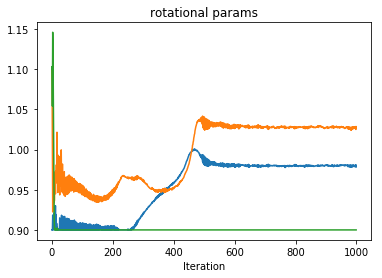

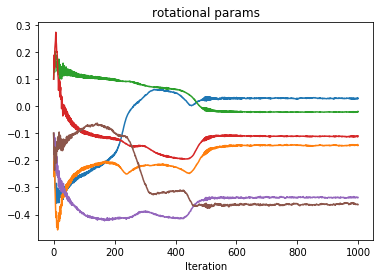

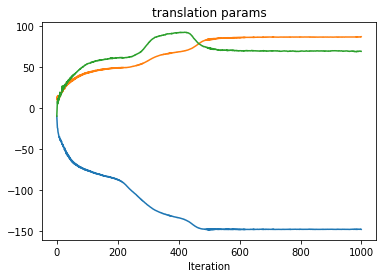

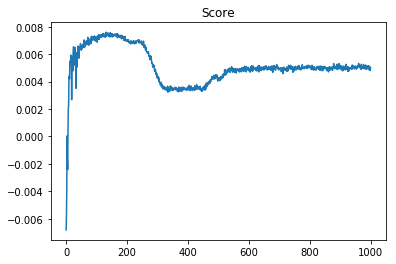

In [60]:
plot_alignment_results(aligner.Ts[1:], aligner.scores[1:], select_best='max_value')

In [90]:
DataManager.save_alignment_results_v3(aligner=aligner, select_best='max_value', 
                                      alignment_spec=global_alignment_spec)

aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_warp20_MD589_detector998_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_warp20_MD589_detector998_10.0um_scoreVolume_parameters.json" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_warp20_MD589_detector998_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_warp20_MD589_detector998_10.0um_scoreVolume_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_warp20_MD589_detector998_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_warp20_MD589_detector998_10.0um_scoreVolume_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_warp20_MD589_detector998_10.0um_scoreVolume/atlasV6_10.0um_scoreVolume_warp20_MD589_detector998_10.0um_scoreVolume_scoreHistory.bp"
0
aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_warp20_MD589_detect

In [5]:
transform = DataManager.load_alignment_results_v3(alignment_spec=global_alignment_spec, what='parameters')

In [7]:
moving_brain = DataManager.load_original_volume_all_known_structures_v3(stack_spec=brain_m_spec, 
                                                                         in_bbox_wrt='canonicalAtlasSpace', 
                                                         common_shape=False
                                                    )

Prior structure/index map not found. Generating a new one.


rm -rf "/home/yuncong/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5I_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes"
0
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5I_L.bp" "/home/yuncong/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5I_L.bp"
0
rm -rf "/home/yuncong/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5I_L_origin_wrt_canonicalAtlasSpace.txt" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes"
0
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5I_L_origin_wrt_canonicalAtlasSpace.txt" "/home/yuncong/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume/score_volumes/atlasV6_10.0um_scoreVolume_Sp5I_L_origin

In [11]:
aligned_moving_brain = {s: transform_volume_v4(v, transform=transform) for s, v in moving_brain.iteritems()}

/home/yuncong/Brain/utilities/registration_utilities.py:1545: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(volume_m_aligned_to_f.dtype, np.float):
Interpolating/filling sparse volume: 0.13 seconds.
Interpolating/filling sparse volume: 0.26 seconds.
Interpolating/filling sparse volume: 0.10 seconds.
Interpolating/filling sparse volume: 0.06 seconds.
Interpolating/filling sparse volume: 0.03 seconds.
Interpolating/filling sparse volume: 0.23 seconds.
Interpolating/filling sparse volume: 0.19 seconds.
Interpolating/filling sparse volume: 0.07 seconds.
Interpolating/filling sparse volume: 0.02 seconds.
Interpolating/filling sparse volume: 0.22 seconds.
Interpolating/filling sparse volume: 0.52 seconds.
Interpolating/filling sparse volume: 0.10 seconds.
Interpolating/filling sparse volume: 0.09 seconds.
Interpolating/filling sparse volume: 

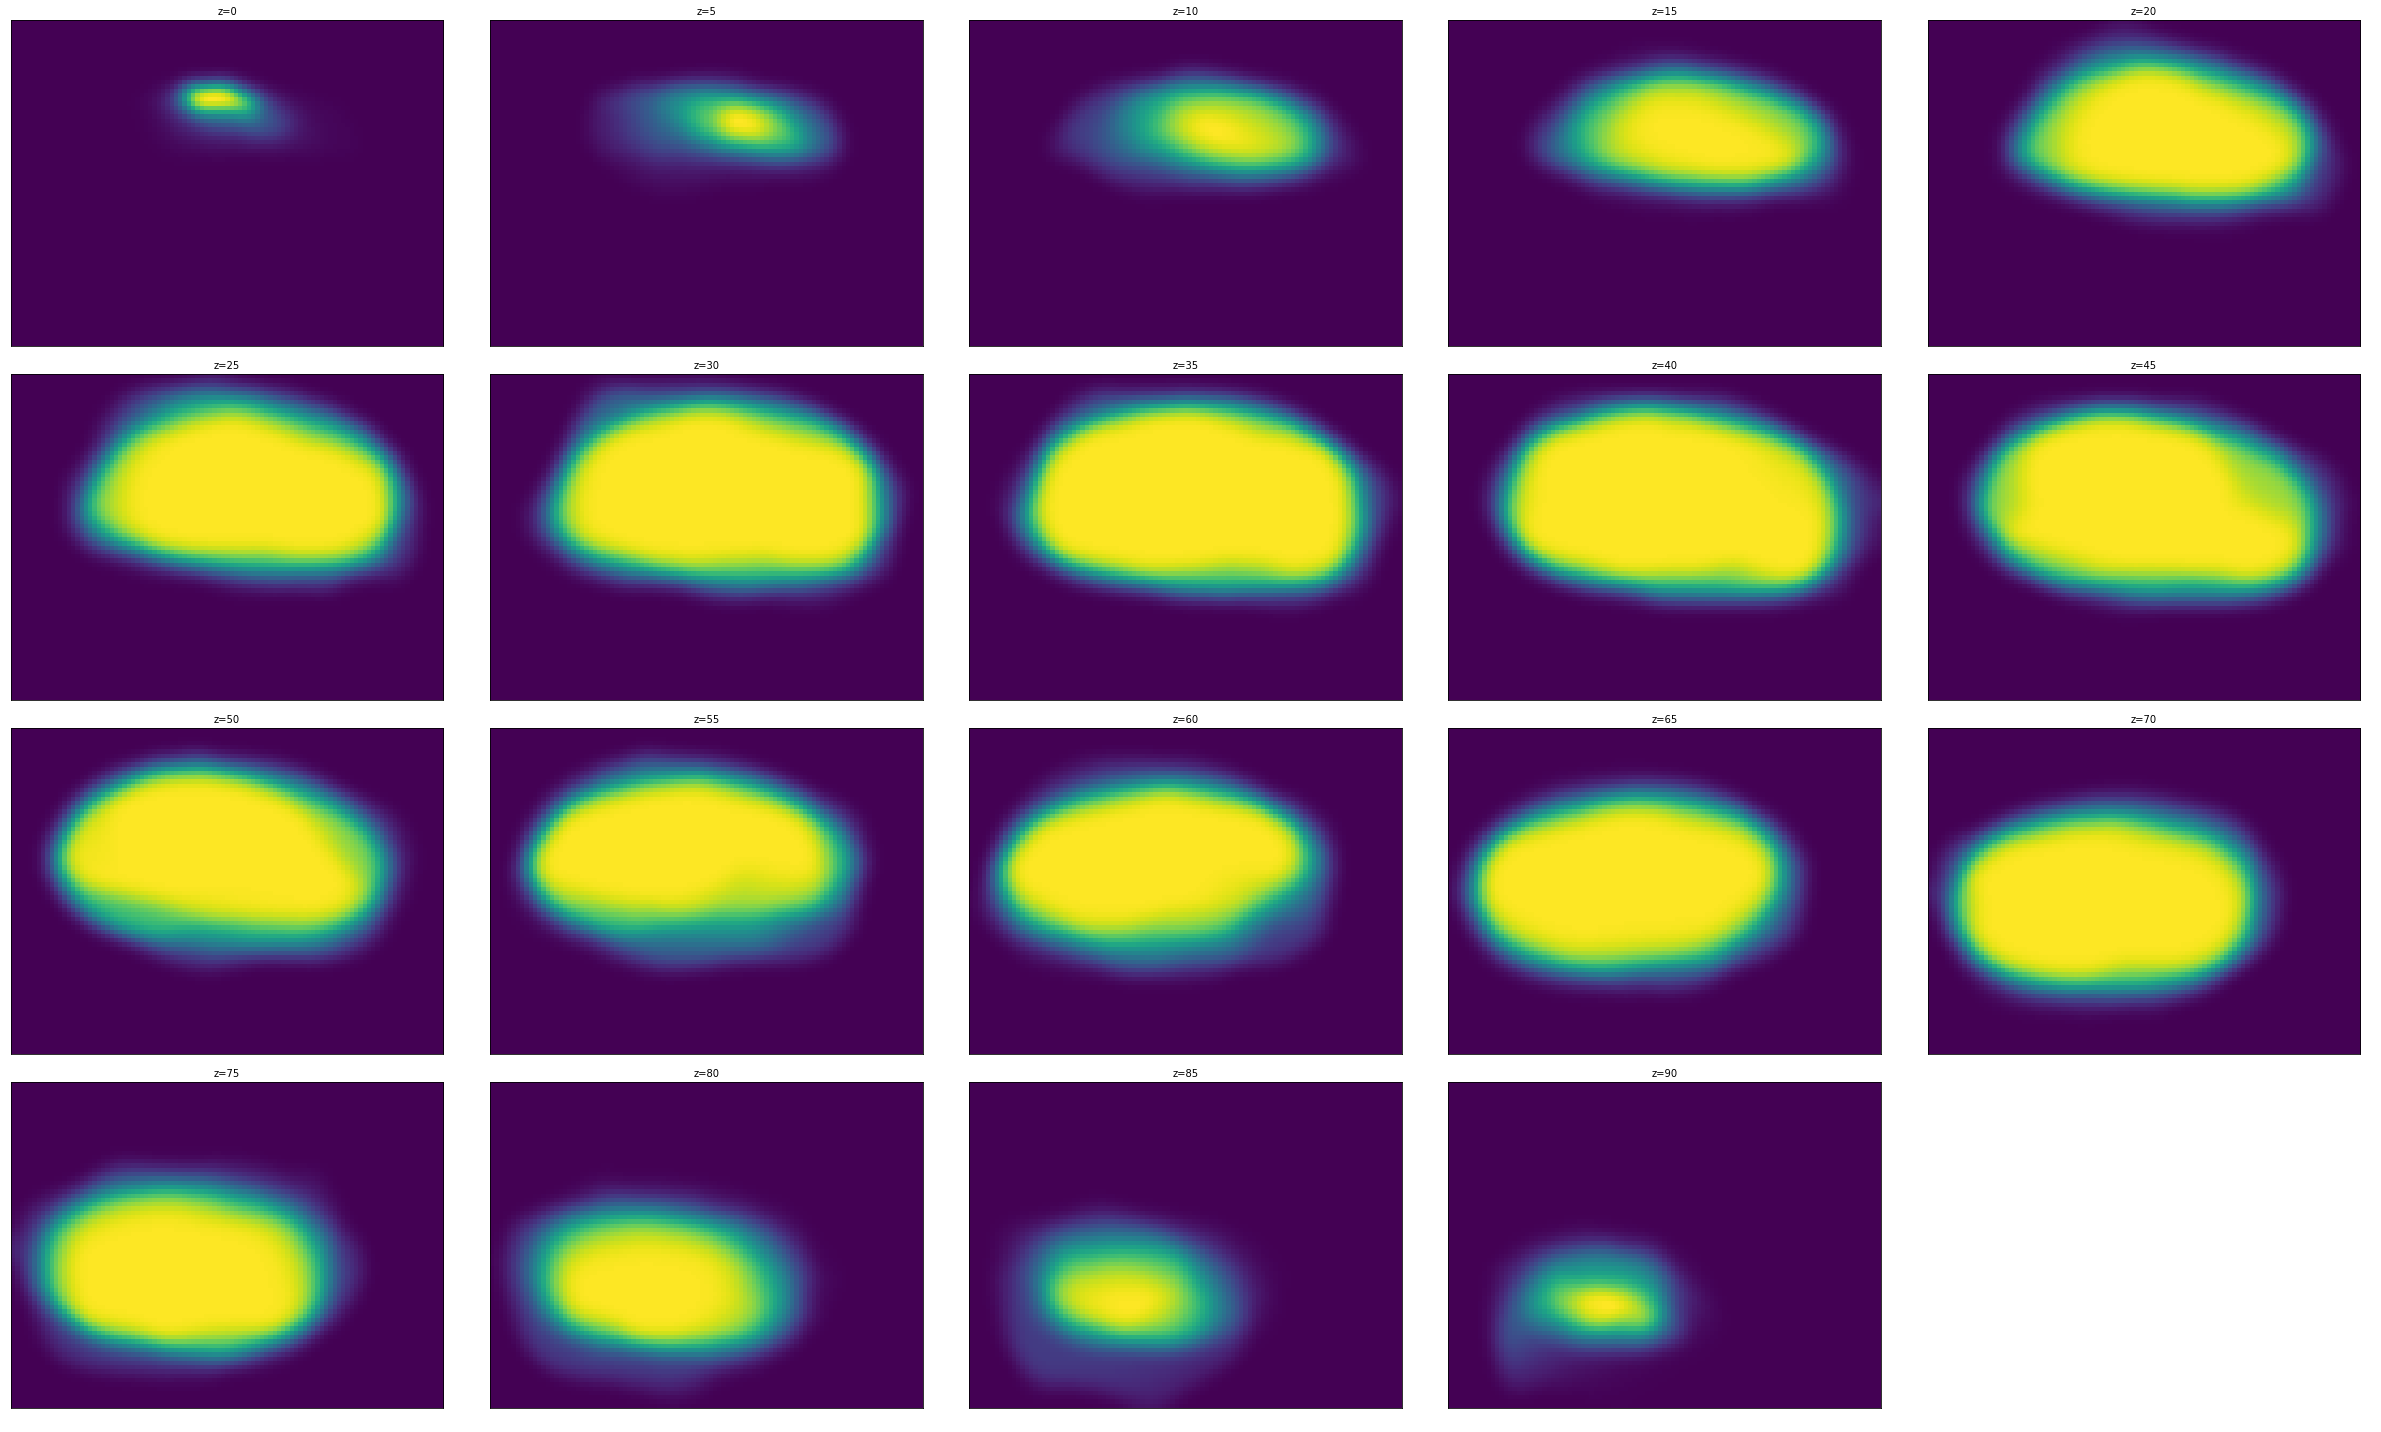

In [14]:
display_volume_sections(moving_brain['7N_L'][0])

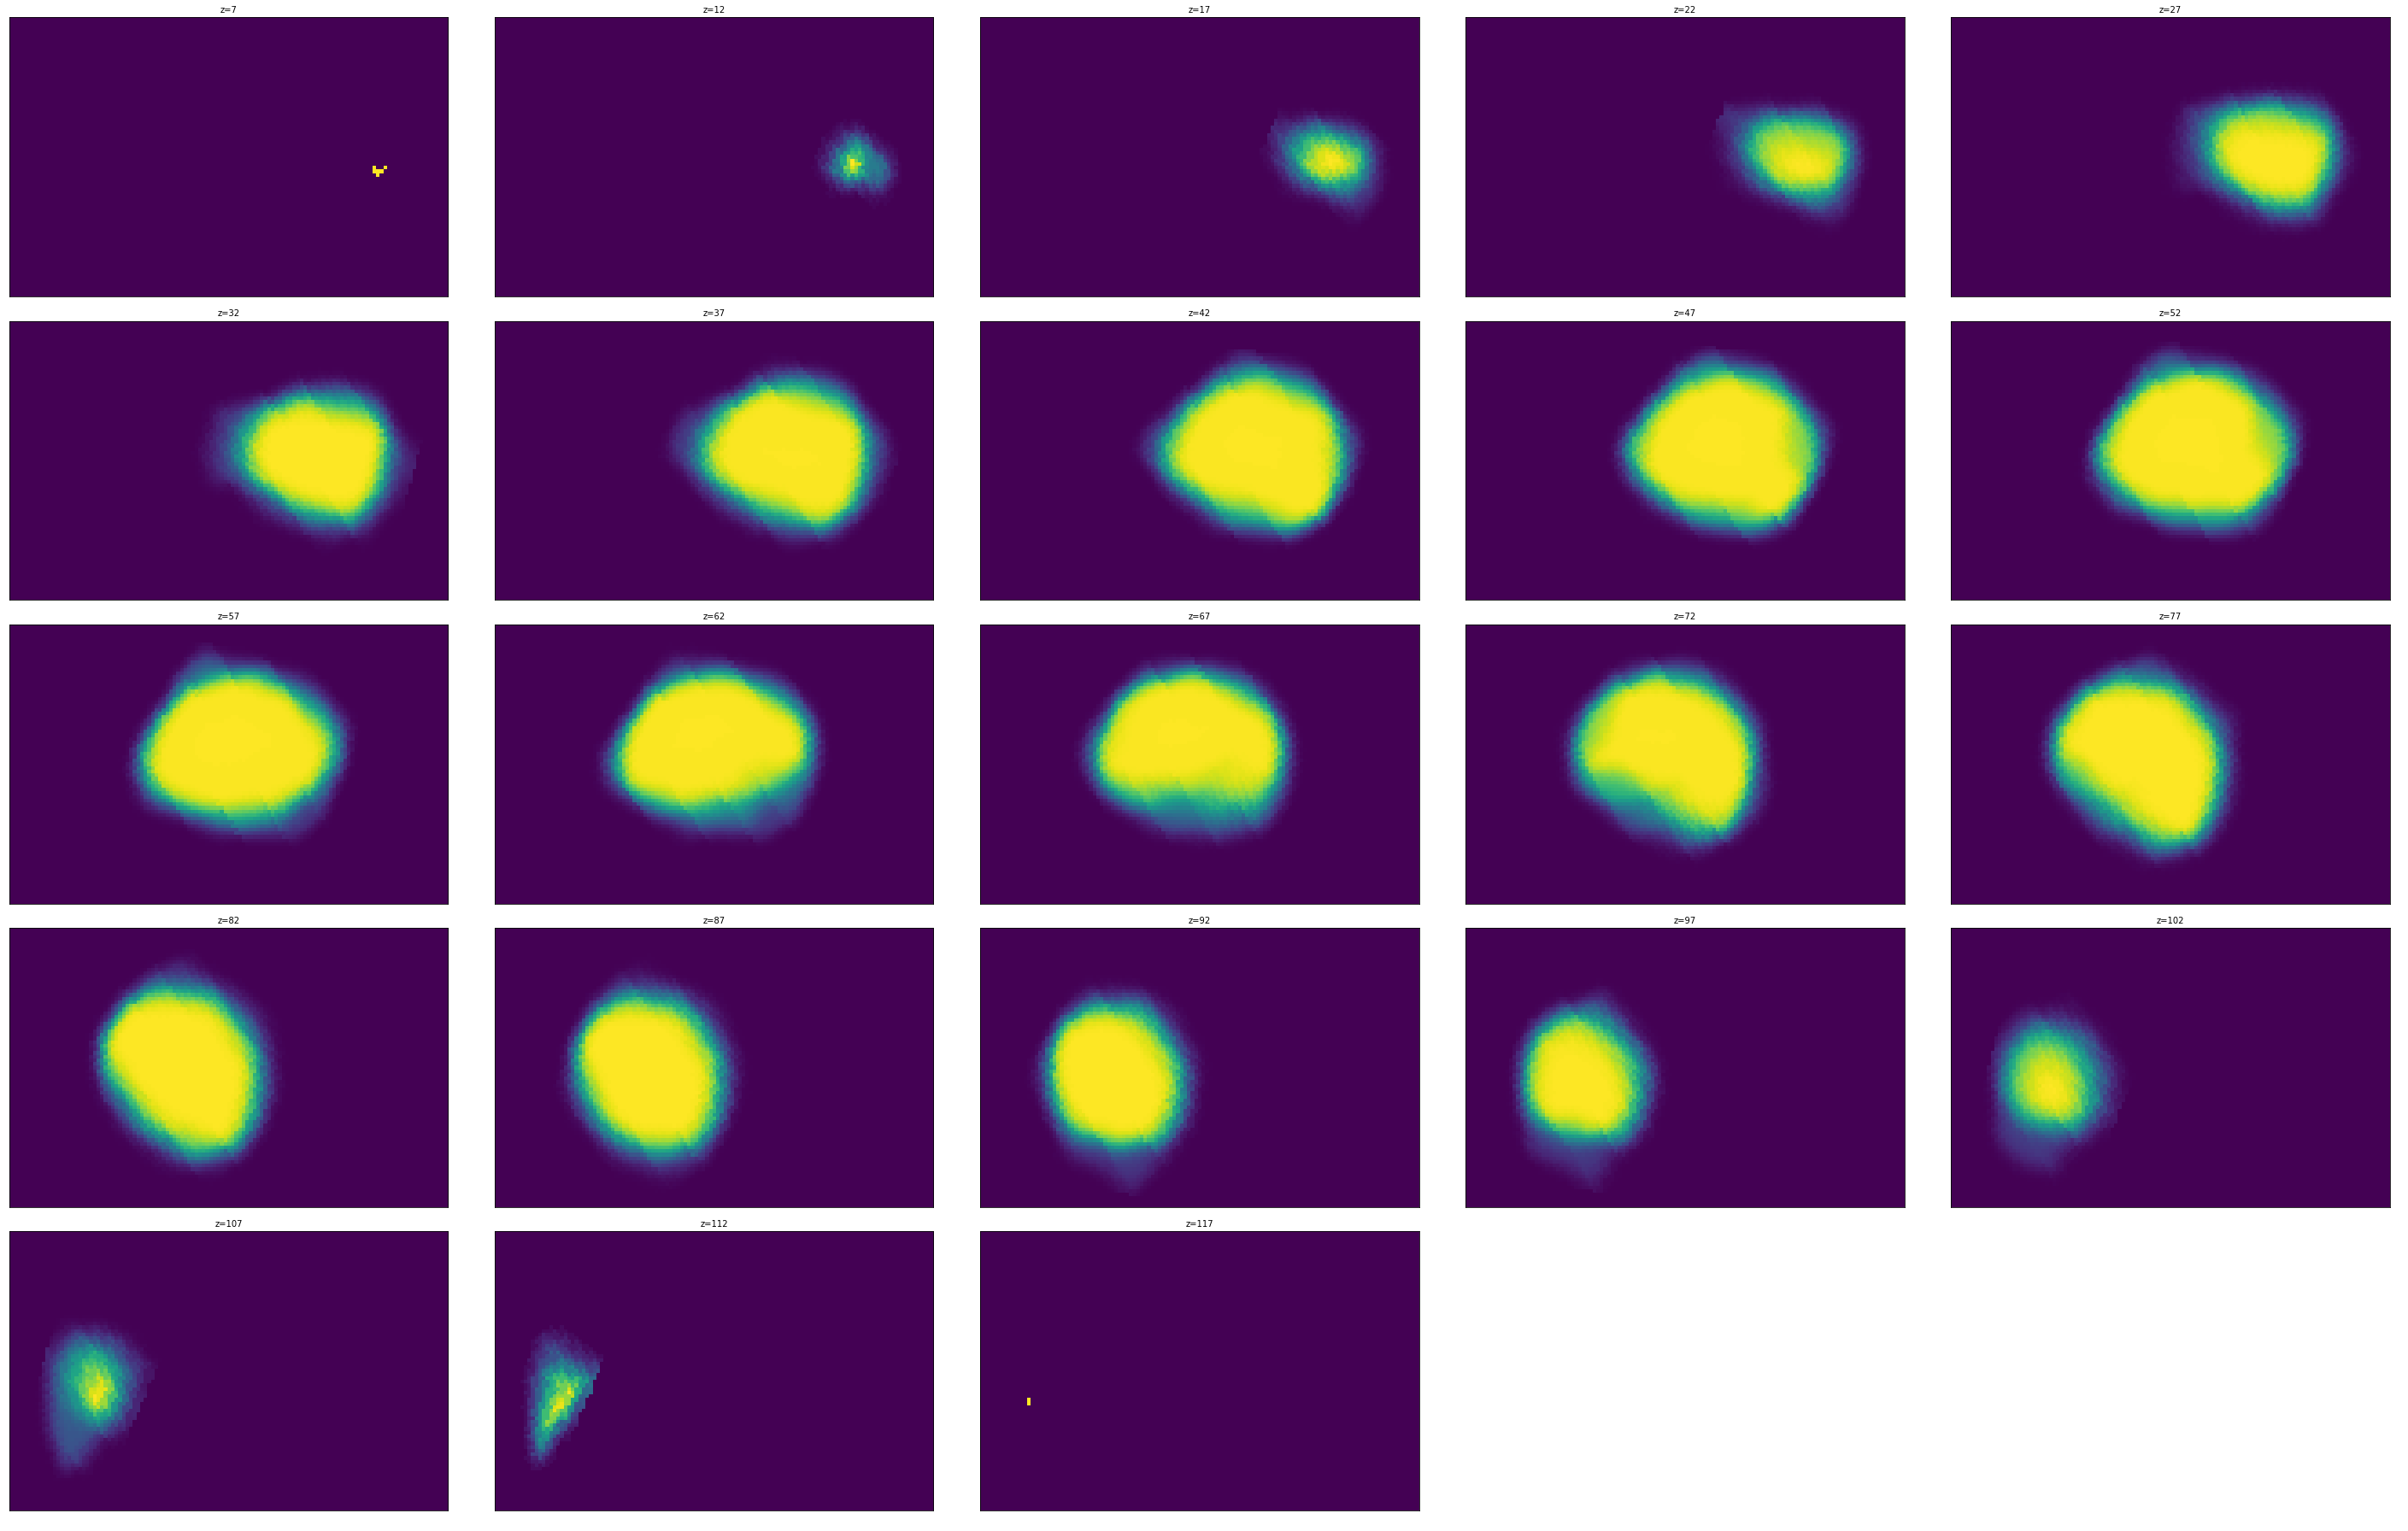

In [13]:
display_volume_sections(aligned_moving_brain['7N_L'][0])

In [99]:
scale_registration_resol_to_original_resol = transform_parameters['resolution_um'] / convert_resolution_string_to_voxel_size(resolution=stack_m_spec['resolution'], stack=stack_m_spec['name'])
# scale to original resolution of the moving volume
print 'scale_registration_resol_to_original_resol =', scale_registration_resol_to_original_resol

parameters_rescaled_to_originalResol = transform_parameters['parameters'].copy()
parameters_rescaled_to_originalResol[[3,7,11]] = np.array(transform_parameters['parameters'])[[3,7,11]] * scale_registration_resol_to_original_resol

transform_parameters_originalResol = {'centroid_f_wrt_wholebrain': transform_parameters['centroid_f_wrt_wholebrain'] * scale_registration_resol_to_original_resol, 
                             'centroid_m_wrt_wholebrain': transform_parameters['centroid_m_wrt_wholebrain'] * scale_registration_resol_to_original_resol,
                             'parameters': parameters_rescaled_to_originalResol.flatten()
                            }    

for name_s in ['SNR_L', 'RMC_L', '3N_L']:
# for name_s in all_known_structures_sided_with_surround:
# for name_s in ['7N_L']:
# for name_s in ['5N_L', '7n_L', '7N_L']:
# for name_s in ['SNR_L', 'Sp5C_L', 'SC', 'IC', '5N_L', '7N_L', '12N']:
# ['SNR_L_surround_200',
#  'Sp5C_L_surround_200',
#  'SC_surround_200',
#  'IC_surround_200',
#  '5N_L_surround_200',
#  '7N_L_surround_200',
#  '12N_surround_200']
    
    volume, bbox_wrt_atlasSpace = \
    DataManager.load_original_volume_v2(stack_m_spec, structure=name_s, bbox_wrt='atlasSpace')
                                 
    transformed_vol, transformed_vol_box_wrt_fixedWholebrain = \
    transform_volume_by_alignment_parameters_v2(volume, bbox=bbox_wrt_atlasSpace, 
                                             transform_parameters=transform_parameters_originalResol)
#     print transformed_vol.shape, transformed_vol_box_wrt_fixedWholebrain

    DataManager.save_transformed_volume(volume=transformed_vol, 
                                        bbox=transformed_vol_box_wrt_fixedWholebrain, 
                                        alignment_spec=global_alignment_spec, 
                                        resolution=stack_m_spec['resolution'], 
                                        structure=name_s)
    del volume, transformed_vol

scale_registration_resol_to_original_resol = 1.0


Interpolating/filling sparse volume: 0.19 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_SNR_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_SNR_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_SNR_L_bbox_wrt_fixedWholebrain.txt"
0


Interpolating/filling sparse volume: 0.04 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_RMC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_RMC_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_RMC_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_RMC_L_bbox_wrt_fixedWholebrain.txt"
0


Interpolating/filling sparse volume: 0.02 seconds.


aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_3N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_3N_L.bp"
0
aws s3 cp "/media/yuncong/YuncongPublic/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_3N_L_bbox_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um/score_volumes/atlasV5_10.0um_scoreVolume_warp20_LM27_10.0um_annotationAsScoreVolume_10.0um_3N_L_bbox_wrt_fixedWholebrain.txt"
0


In [60]:
# transform_matrix = alignment_parameters_to_transform_matrix_v2(transform_parameters=transform_parameters)

In [58]:
stack_m_spec = dict(name='atlasV5',
                   vol_type='score',
                   detector_id=None,
                   prep_id=None,
                   structure=None,
                   resolution='10.0um')

stack_f_spec = dict(name='LM27',
                   vol_type='annotationAsScore',
                   detector_id=None,
                   prep_id=None,
                   structure=None,
                   resolution='10.0um')

global_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=20)

warped_volumes_global = \
DataManager.load_transformed_volume_all_known_structures_v3(alignment_spec=global_alignment_spec,
                                                            resolution='10.0um',
#                                                             structures=['SNR_L', 'Sp5C_L', 'SC', 'IC', '5N_L', '7N_L', '12N'], 
                                                            structures=['SNR_L', '3N_L', 'RMC_L'], 
                                                            sided=True, 
                                                            return_label_mappings=False, 
                                                            name_or_index_as_key='name', 
                                                            common_shape=False,
                                                           return_origin_instead_of_bbox=True)
if len(warped_volumes_global) == 0:
    raise Exception('No volumes are loaded.')

Prior structure/index map not found. Generating a new one.


In [67]:
v, o = volume_moving[global_aligner_parameters['structure_to_label_moving']['SNR_L']]

In [68]:
o

array([ 893.,  445.,  258.])

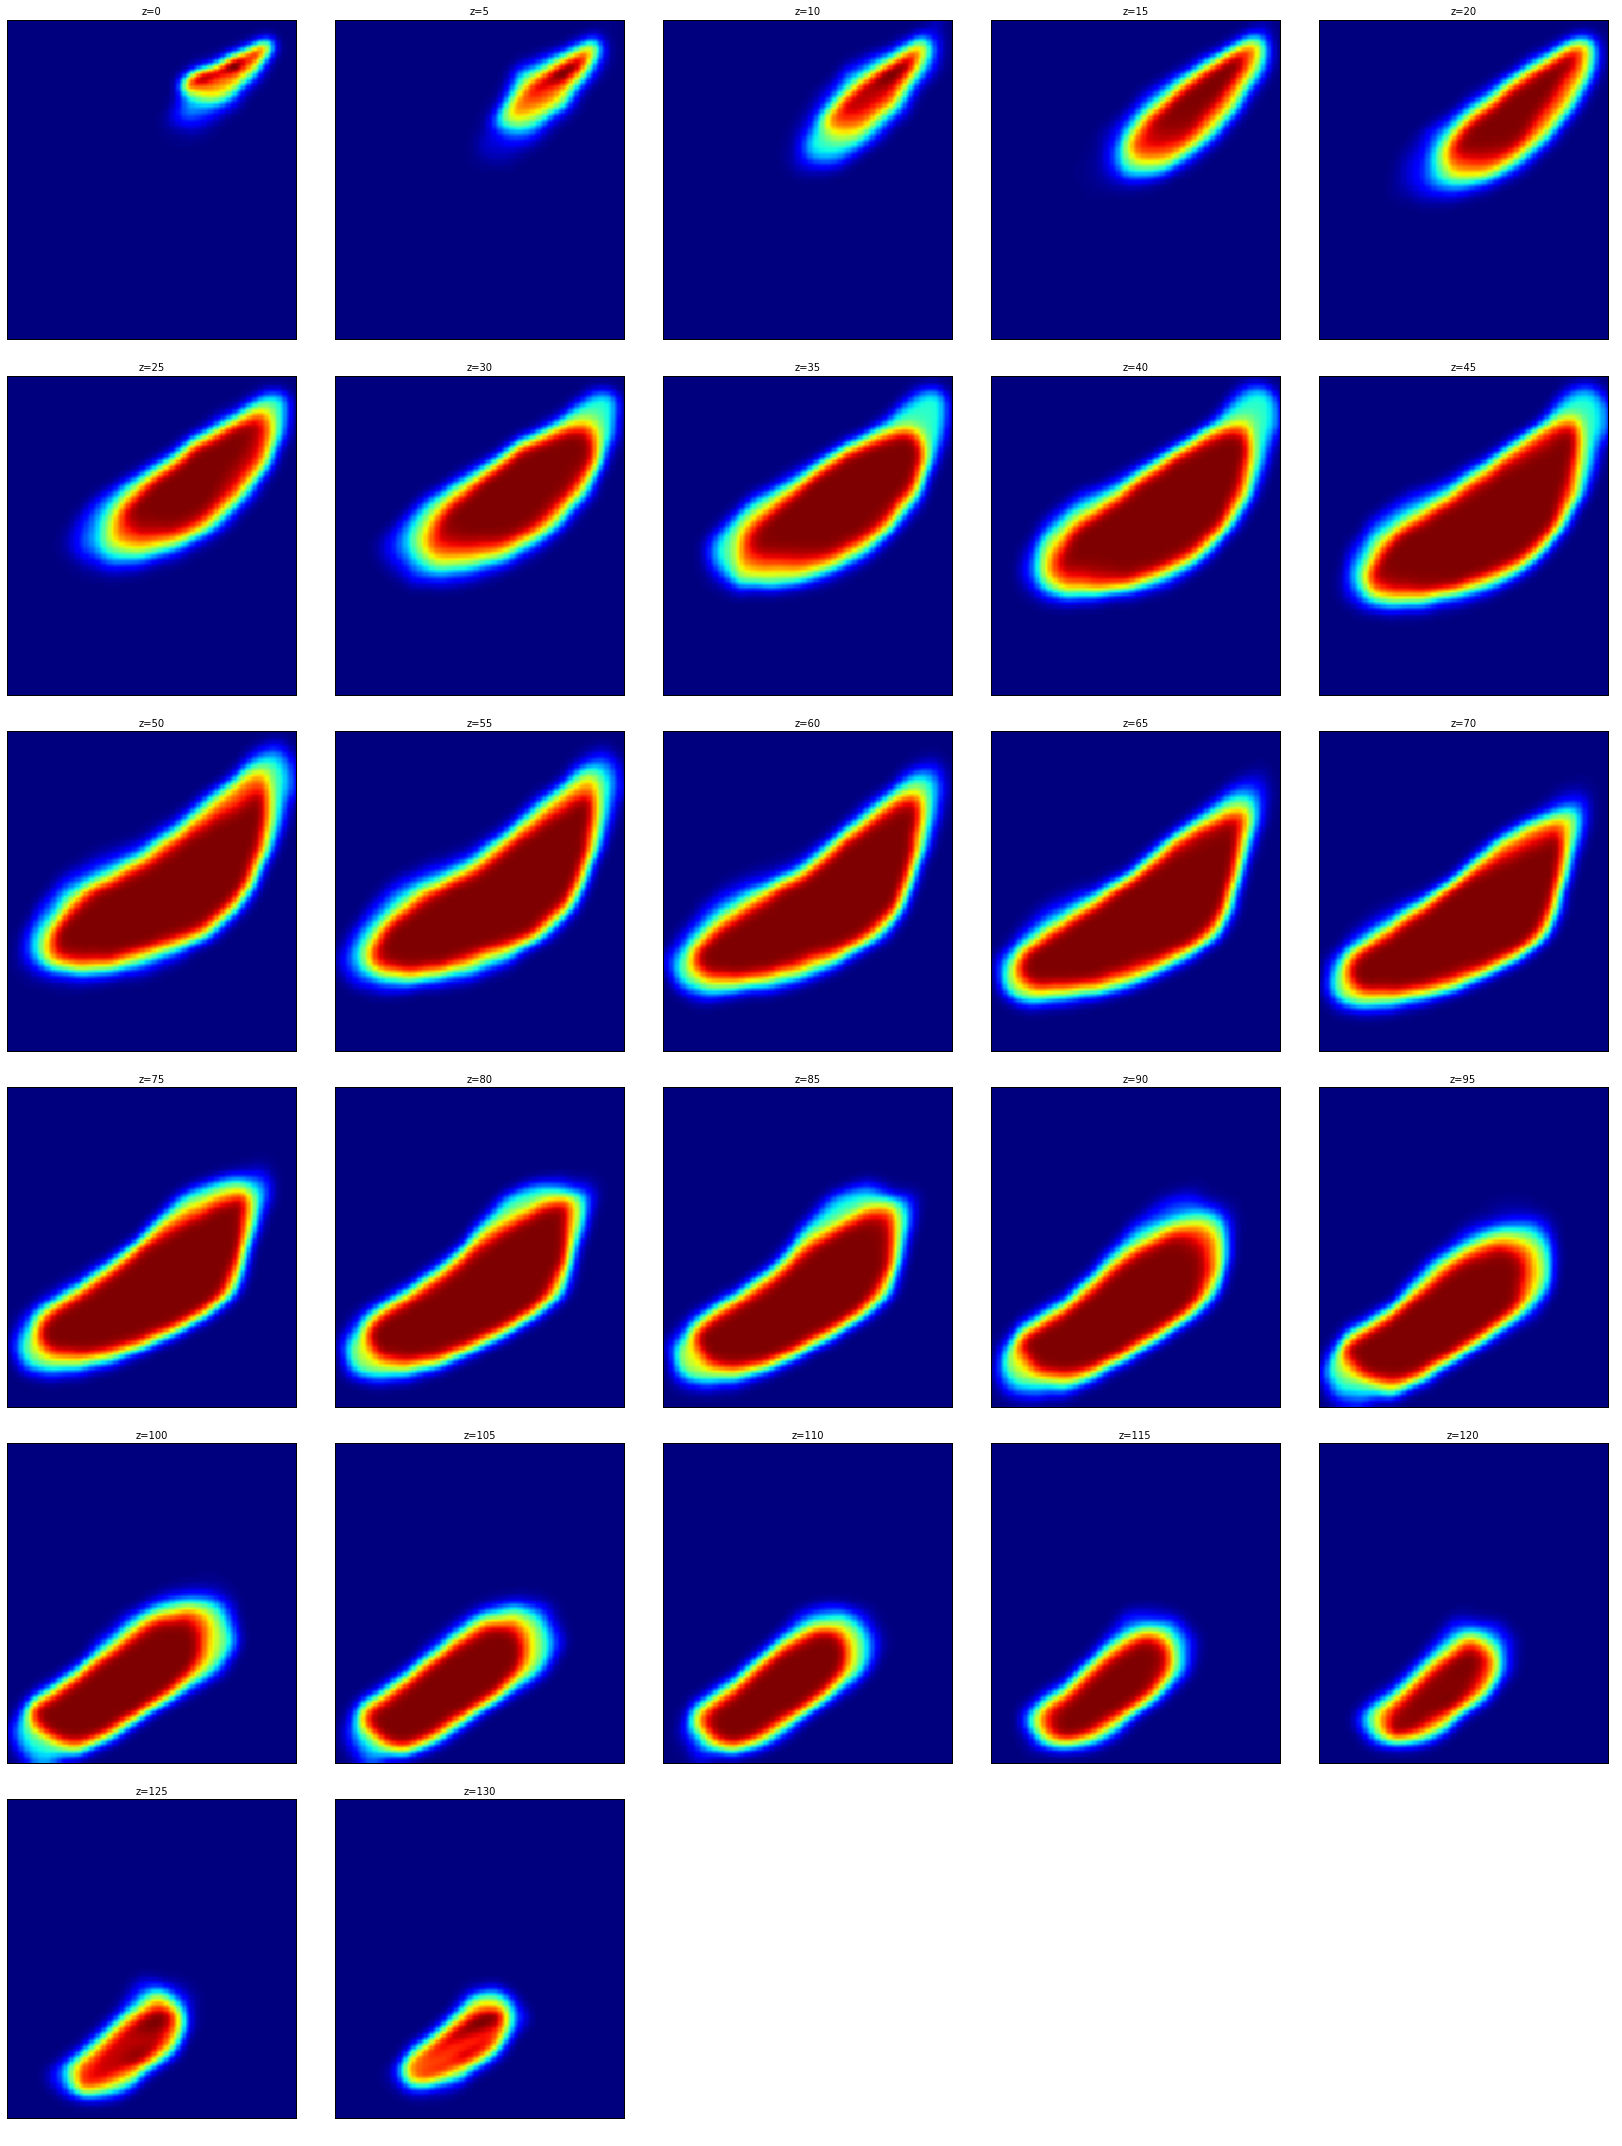

In [69]:
display_volume_sections(v)

In [62]:
warped_volumes_global['SNR_L']

(array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0

In [64]:
v, o = volume_fixed[global_aligner_parameters['structure_to_label_fixed']['SNR_L']]

In [66]:
o

array([    0.,  -426., -2415.])

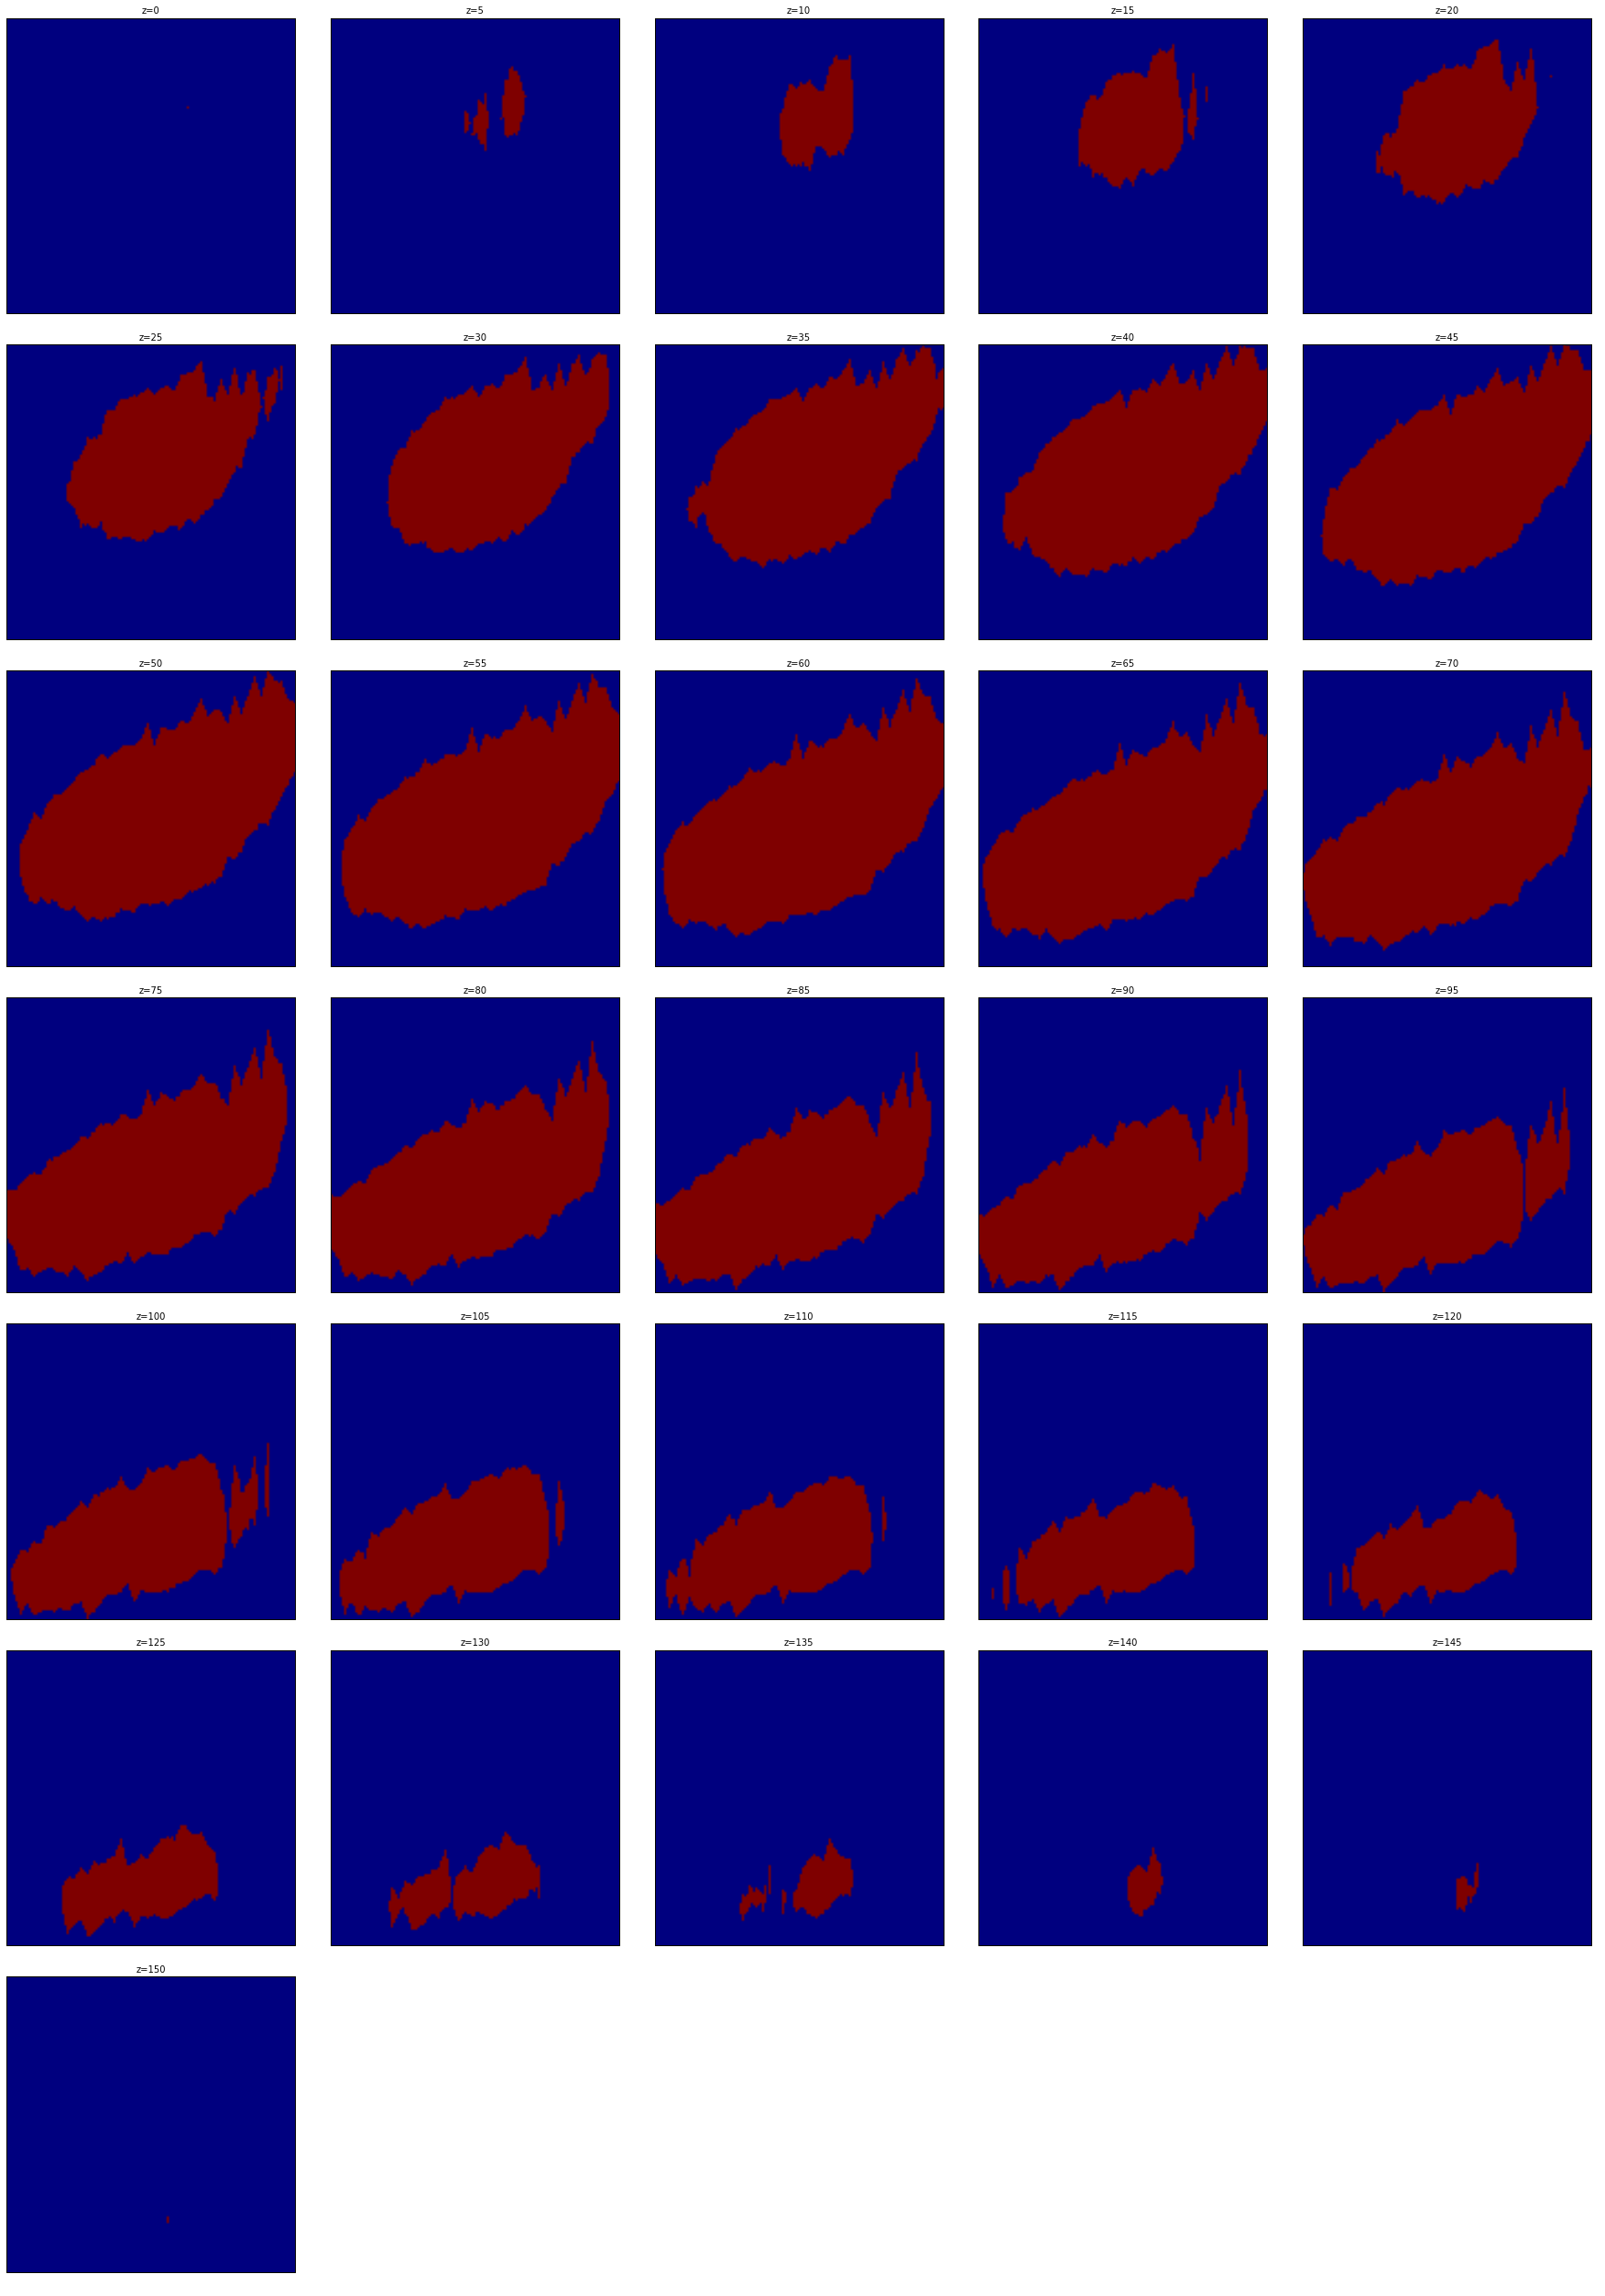

In [65]:
display_volume_sections(v)

# Local (simple global)

In [ ]:
# See construct_score_volume_v7_roi.ipynb

In [35]:
structure_m = '7N_R'

In [36]:
stack_m_spec = dict(name='atlasV6',
                   vol_type='score',
                   structure=structure_m,
                    resolution='10.0um'
                   )

stack_f_spec = dict(name='CHATM3',
                   vol_type='score',
                   detector_id=799,
                   structure=convert_to_original_name(structure_m),
                    resolution='10.0um'
                   )

local_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=27)

In [ ]:
local_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=local_alignment_spec,
structures_m=[structure_m],
            fixed_surroundings_have_positive_value=False,
                                                          fixed_structures_are_sided=True,
                                                          fixed_use_surround=False
)

In [38]:
aligner = Aligner(local_aligner_parameters['volume_fixed'], 
                  local_aligner_parameters['volume_moving'], 
                  labelIndexMap_m2f=local_aligner_parameters['label_mapping_m2f'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


In [39]:
T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol = bp.unpack_ndarray_file('/home/yuncong/' + stack_f_spec['name'] + '_T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.bp')

In [40]:
aligner.set_initial_transform(params=T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.flatten())

Set initial transform to [ 9.87580130e-01  1.57126095e-01  0.00000000e+00  1.26509838e+03
 -1.57126095e-01  9.87580130e-01  0.00000000e+00  4.90968802e+02
  0.00000000e+00  0.00000000e+00  1.00000000e+00  4.60000000e+02].


In [41]:
aligner.set_centroid(centroid_m='structure_centroid', 
                     centroid_f='centroid_m',
                    indices_m=[local_aligner_parameters['structure_to_label_moving'][structure_m]])

aligner.compute_gradient(smooth_first=True)

aligner.set_label_weights(label_weights=local_aligner_parameters['label_weights_m'])

centroid_m: [1313.29813464  599.92894147  573.90920328], centroid_f: [1313.29813464  599.92894147  573.90920328]
indices_f: set([1])


In [42]:
# _, _ = aligner.optimize(tf_type=local_aligner_parameters['transform_type'], 
#                              max_iter_num=0,
#                              history_len=100, 
#                              terminate_thresh_trans=.01,
#                              full_lr=np.array([1,1,1,.01,.01,.01]),
#                             )

In [43]:
_, _ = aligner.optimize(tf_type=local_aligner_parameters['transform_type'], 
#                             max_iter_num=0,
                             max_iter_num=1000,
                             history_len=100, 
                             terminate_thresh_trans=.01,
                             full_lr=np.array([1,1,1,.01,.01,.01]),
                            )


iteration 0
Norm of gradient (translation) = 1.732051
Norm of gradient (rotation) = 1.732051
around x=-0.58; around y=-0.57; around z=0.58
step: 0.39 seconds
current score: -0.009298
new_T: [ 0.9999     -0.0099495  -0.0100495   0.98996692  0.0100495   0.9999
  0.0099495   1.00996642  0.0099495  -0.0100495   0.9999      0.99993333]
det: 1.00

iteration 1
Norm of gradient (translation) = 1.287040
Norm of gradient (rotation) = 1.320868
around x=-1.01; around y=-1.02; around z=1.01
step: 0.39 seconds
current score: -0.009005
new_T: [ 0.99968549 -0.01728014 -0.01817479  1.66644136  0.0175937   0.99969664
  0.01723647  1.77324725  0.01787143 -0.01755081  0.99968624  1.78586289]
det: 1.00

iteration 2
Norm of gradient (translation) = 1.209373
Norm of gradient (rotation) = 1.173621
around x=-1.38; around y=-1.44; around z=1.39
step: 0.38 seconds
current score: -0.007623
new_T: [ 0.99939132 -0.02363029 -0.02566325  2.3464713   0.024235    0.99942973
  0.02351357  2.45146988  0.02509298 -0.0241

Norm of gradient (translation) = 0.300488
Norm of gradient (rotation) = 0.397076
around x=-5.90; around y=-5.26; around z=5.91
step: 0.44 seconds
current score: 0.014940
new_T: [ 0.99049572 -0.09310875 -0.10123734  7.44865003  0.10258141  0.99038843
  0.09277825 10.70022886  0.09162582 -0.10228153  0.99052673  9.41813714]
det: 1.00

iteration 23
1: 558155 valid, 3563 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.285054
Norm of gradient (rotation) = 0.384225
around x=-6.05; around y=-5.32; around z=6.07
step: 0.43 seconds
current score: 0.015758
new_T: [ 0.99011076 -0.09539876 -0.10285793  7.47359405  0.10525664  0.98988747
  0.0950991  10.98680229  0.09274544 -0.10498512  0.99013959  9.53346854]
det: 1.00

iteration 24
1: 557951 valid, 3767 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.270466
Norm of gradient (rotation) = 0.372263
around x=-6.21; around y=-5.38; around z=6.22
step: 0.41 seconds
current score: 0.016546
new_T: [ 0.98973

Norm of gradient (translation) = 0.199697
Norm of gradient (rotation) = 0.262144
around x=-8.60; around y=-5.44; around z=8.65
step: 0.40 seconds
current score: 0.030262
new_T: [ 0.98416375 -0.13470019 -0.11522834  5.94084715  0.14973902  0.97963924
  0.13373554 15.74015913  0.094868   -0.14887185  0.9842953   9.62583772]
det: 1.00

iteration 44
1: 557347 valid, 4371 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.198189
Norm of gradient (rotation) = 0.259349
around x=-8.71; around y=-5.41; around z=8.76
step: 0.40 seconds
current score: 0.030960
new_T: [ 0.98392183 -0.13646038 -0.11522326  5.82665418  0.15164934  0.97911768
  0.13539218 15.94316513  0.09434147 -0.15068885  0.98406939  9.56353321]
det: 1.00

iteration 45
1: 557429 valid, 4289 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.196611
Norm of gradient (rotation) = 0.256681
around x=-8.81; around y=-5.38; around z=8.87
step: 0.39 seconds
current score: 0.031654
new_T: [ 0.98368

Norm of gradient (translation) = 0.153979
Norm of gradient (rotation) = 0.208596
around x=-10.55; around y=-4.76; around z=10.74
step: 0.39 seconds
current score: 0.044394
new_T: [ 0.97909275 -0.16825602 -0.1143123   3.90818449  0.18569741  0.96871103
  0.16466759 19.54420787  0.08302927 -0.18245234  0.97970265  8.27133805]
det: 1.00

iteration 65
1: 559022 valid, 2696 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.151711
Norm of gradient (rotation) = 0.206232
around x=-10.63; around y=-4.74; around z=10.83
step: 0.39 seconds
current score: 0.045016
new_T: [ 0.97883948 -0.16966388 -0.11440031  3.83215386  0.18721548  0.9681986
  0.16595731 19.70408548  0.08260526 -0.18386308  0.97947473  8.22206144]
det: 1.00

iteration 66
1: 559080 valid, 2638 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.149304
Norm of gradient (rotation) = 0.203994
around x=-10.71; around y=-4.72; around z=10.92
step: 0.39 seconds
current score: 0.045647
new_T: [ 0.

Norm of gradient (translation) = 0.118866
Norm of gradient (rotation) = 0.168329
around x=-12.14; around y=-4.50; around z=12.42
step: 0.39 seconds
current score: 0.056284
new_T: [ 0.97357545 -0.19420583 -0.12014551  2.69571192  0.21446175  0.95830762
  0.18881911 22.5672386   0.07846659 -0.20959627  0.9746345   7.68183983]
det: 1.00

iteration 86
1: 559601 valid, 2117 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.117726
Norm of gradient (rotation) = 0.166778
around x=-12.21; around y=-4.50; around z=12.49
step: 0.39 seconds
current score: 0.056780
new_T: [ 0.97330744 -0.1952609  -0.12060599  2.65585981  0.21567903  0.95783527
  0.18982664 22.69497302  0.07845495 -0.21077186  0.97438188  7.67472109]
det: 1.00

iteration 87
1: 559604 valid, 2114 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.116662
Norm of gradient (rotation) = 0.165250
around x=-12.27; around y=-4.50; around z=12.57
step: 0.39 seconds
current score: 0.057264
new_T: [ 0

Norm of gradient (translation) = 0.099148
Norm of gradient (rotation) = 0.138076
around x=-13.47; around y=-4.60; around z=13.78
step: 0.41 seconds
current score: 0.065330
new_T: [ 0.9680758  -0.21350449 -0.13132049  2.09693505  0.23745274  0.94894709
  0.20764302 24.97976208  0.08028348 -0.23219659  0.96934994  7.74575795]
det: 1.00

iteration 107
1: 559414 valid, 2304 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.098234
Norm of gradient (rotation) = 0.136775
around x=-13.53; around y=-4.61; around z=13.84
step: 0.40 seconds
current score: 0.065690
new_T: [ 0.96782524 -0.21428926 -0.13188786  2.07766962  0.23842034  0.94853278
  0.20842578 25.08134807  0.08043655 -0.23316448  0.96910489  7.75577358]
det: 1.00

iteration 108
1: 559400 valid, 2318 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.097409
Norm of gradient (rotation) = 0.135266
around x=-13.58; around y=-4.62; around z=13.90
step: 0.40 seconds
current score: 0.066039
new_T: [

Norm of gradient (translation) = 0.082278
Norm of gradient (rotation) = 0.111685
around x=-14.51; around y=-4.79; around z=14.82
step: 0.41 seconds
current score: 0.071347
new_T: [ 0.963369   -0.22734877 -0.14224169  1.86287399  0.25484779  0.94124616
  0.22160385 26.80837515  0.08350308 -0.24973626  0.96470671  7.9742352 ]
det: 1.00

iteration 127
1: 559055 valid, 2663 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.081420
Norm of gradient (rotation) = 0.110349
around x=-14.56; around y=-4.80; around z=14.86
step: 0.40 seconds
current score: 0.071597
new_T: [ 0.96315175 -0.22794829 -0.14275249  1.85649655  0.25561585  0.94089377
  0.22221487 26.88925353  0.08366143 -0.25051644  0.96449068  7.98582901]
det: 1.00

iteration 128
1: 559033 valid, 2685 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.080610
Norm of gradient (rotation) = 0.109188
around x=-14.61; around y=-4.81; around z=14.91
step: 0.40 seconds
current score: 0.071806
new_T: [

Norm of gradient (translation) = 0.066719
Norm of gradient (rotation) = 0.088542
around x=-15.35; around y=-4.96; around z=15.64
step: 0.40 seconds
current score: 0.075307
new_T: [ 0.95936679 -0.2379488  -0.15164346  1.80121749  0.26859652  0.93477931
  0.23247271 28.25872423  0.08643656 -0.2637575   0.96070844  8.18918427]
det: 1.00

iteration 147
1: 558700 valid, 3018 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.066224
Norm of gradient (rotation) = 0.087669
around x=-15.39; around y=-4.97; around z=15.68
step: 0.40 seconds
current score: 0.075459
new_T: [ 0.95918517 -0.23840791 -0.15207061  1.80093664  0.26920096  0.93448729
  0.2329471  28.32263041  0.08657162 -0.26437696  0.96052599  8.19904837]
det: 1.00

iteration 148
1: 558698 valid, 3020 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.065366
Norm of gradient (rotation) = 0.086667
around x=-15.43; around y=-4.97; around z=15.71
step: 0.40 seconds
current score: 0.075601
new_T: [

Norm of gradient (translation) = 0.053976
Norm of gradient (rotation) = 0.070191
around x=-16.02; around y=-5.10; around z=16.29
step: 0.40 seconds
current score: 0.077738
new_T: [ 0.95605319 -0.24607189 -0.15940804  1.8265592   0.27939571  0.92946356
  0.24090566 29.40280202  0.08888385 -0.27485655  0.95736803  8.36441789]
det: 1.00

iteration 167
1: 558432 valid, 3286 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.053712
Norm of gradient (rotation) = 0.069135
around x=-16.05; around y=-5.11; around z=16.32
step: 0.40 seconds
current score: 0.077839
new_T: [ 0.95590454 -0.24642532 -0.15975315  1.83047254  0.27986991  0.92922533
  0.24127397 29.45317068  0.08899066 -0.27534498  0.95721774  8.37192915]
det: 1.00

iteration 168
1: 558419 valid, 3299 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.053104
Norm of gradient (rotation) = 0.068401
around x=-16.08; around y=-5.11; around z=16.35
step: 0.40 seconds
current score: 0.077935
new_T: [

Norm of gradient (translation) = 0.043048
Norm of gradient (rotation) = 0.055450
around x=-16.55; around y=-5.22; around z=16.80
step: 0.40 seconds
current score: 0.079239
new_T: [ 0.95334385 -0.25230772 -0.16575984  1.89027348  0.28787101  0.9251458
  0.24745815 30.30481482  0.09091642 -0.28363016  0.95461413  8.50243474]
det: 1.00

iteration 187
1: 558197 valid, 3521 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.042625
Norm of gradient (rotation) = 0.054829
around x=-16.57; around y=-5.22; around z=16.82
step: 0.39 seconds
current score: 0.079300
new_T: [ 0.95322248 -0.25257868 -0.16604493  1.89344258  0.28824351  0.92495307
  0.24774481 30.34455727  0.09100872 -0.2840173   0.95449022  8.5084098 ]
det: 1.00

iteration 188
1: 558189 valid, 3529 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.042096
Norm of gradient (rotation) = 0.054084
around x=-16.59; around y=-5.23; around z=16.85
step: 0.39 seconds
current score: 0.079350
new_T: [ 

Norm of gradient (translation) = 0.034448
Norm of gradient (rotation) = 0.043980
around x=-16.97; around y=-5.31; around z=17.21
step: 0.40 seconds
current score: 0.080108
new_T: [ 0.95114646 -0.25712358 -0.17090312  1.96169431  0.29453482  0.9216598
  0.25257169 31.01732404  0.0925724  -0.29056959  0.9523653   8.60395754]
det: 1.00

iteration 207
1: 558023 valid, 3695 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.034160
Norm of gradient (rotation) = 0.043478
around x=-16.99; around y=-5.32; around z=17.22
step: 0.40 seconds
current score: 0.080140
new_T: [ 0.95104812 -0.25733291 -0.17113516  1.9652964   0.2948281   0.92150454
  0.25279592 31.04876282  0.09264912 -0.29087654  0.95226413  8.60843093]
det: 1.00

iteration 208
1: 558022 valid, 3696 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.033770
Norm of gradient (rotation) = 0.042934
around x=-17.00; around y=-5.32; around z=17.24
step: 0.40 seconds
current score: 0.080158
new_T: [ 

Norm of gradient (translation) = 0.027810
Norm of gradient (rotation) = 0.035104
around x=-17.30; around y=-5.39; around z=17.52
step: 0.40 seconds
current score: 0.080601
new_T: [ 0.9493623  -0.26083364 -0.17514861  2.0327873   0.29978822  0.91885506
  0.25657824 31.58172641  0.09401195 -0.2960932   0.95052121  8.68372388]
det: 1.00

iteration 227
1: 557883 valid, 3835 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.027360
Norm of gradient (rotation) = 0.034707
around x=-17.32; around y=-5.40; around z=17.54
step: 0.40 seconds
current score: 0.080622
new_T: [ 0.94928248 -0.26099506 -0.17534067  2.03612462  0.30001981  0.91873027
  0.25675438 31.60667342  0.09407916 -0.29633811  0.95043823  8.68721003]
det: 1.00

iteration 228
1: 557877 valid, 3841 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.027057
Norm of gradient (rotation) = 0.034287
around x=-17.33; around y=-5.40; around z=17.55
step: 0.40 seconds
current score: 0.080630
new_T: [

Norm of gradient (translation) = 0.021778
Norm of gradient (rotation) = 0.028034
around x=-17.57; around y=-5.47; around z=17.78
step: 0.40 seconds
current score: 0.080879
new_T: [ 0.94791513 -0.26370079 -0.17865831  2.09805949  0.30394272  0.91660109
  0.25973308 32.03033585  0.09526658 -0.30050681  0.94900998  8.74432568]
det: 1.00

iteration 247
1: 557774 valid, 3944 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.022180
Norm of gradient (rotation) = 0.027769
around x=-17.58; around y=-5.47; around z=17.79
step: 0.41 seconds
current score: 0.080883
new_T: [ 0.94785049 -0.26382576 -0.17881673  2.10165473  0.30412604  0.91650088
  0.25987207 32.05019202  0.09532474 -0.30070269  0.94894209  8.74693264]
det: 1.00

iteration 248
1: 557770 valid, 3948 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.021742
Norm of gradient (rotation) = 0.027468
around x=-17.59; around y=-5.47; around z=17.80
step: 0.40 seconds
current score: 0.080900
new_T: [

Norm of gradient (translation) = 0.017484
Norm of gradient (rotation) = 0.022777
around x=-17.79; around y=-5.53; around z=17.98
step: 0.40 seconds
current score: 0.081035
new_T: [ 0.94673758 -0.26590733 -0.18160741  2.15561629  0.30723611  0.91479144
  0.26222623 32.38794091  0.09640503 -0.30405579  0.94776376  8.79230689]
det: 1.00

iteration 267
1: 557686 valid, 4032 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.017986
Norm of gradient (rotation) = 0.022552
around x=-17.80; around y=-5.54; around z=17.99
step: 0.40 seconds
current score: 0.081039
new_T: [ 0.94668464 -0.26600269 -0.18174368  2.15876772  0.30738171  0.91471097
  0.26233627 32.40380417  0.09646079 -0.3042144   0.94770719  8.79461858]
det: 1.00

iteration 268
1: 557682 valid, 4036 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.017291
Norm of gradient (rotation) = 0.022249
around x=-17.81; around y=-5.54; around z=18.00
step: 0.40 seconds
current score: 0.081041
new_T: [

Norm of gradient (translation) = 0.014309
Norm of gradient (rotation) = 0.018524
around x=-17.96; around y=-5.59; around z=18.14
step: 0.41 seconds
current score: 0.081096
new_T: [ 0.94577632 -0.267597   -0.18411679  2.20576588  0.30985236  0.91333906
  0.26420309 32.67381167  0.0974611  -0.30692605  0.94673002  8.83103936]
det: 1.00

iteration 287
1: 557613 valid, 4105 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.014198
Norm of gradient (rotation) = 0.018310
around x=-17.97; around y=-5.60; around z=18.15
step: 0.40 seconds
current score: 0.081100
new_T: [ 0.94573314 -0.26767004 -0.1842324   2.20792196  0.30996809  0.9132745
  0.2642905  32.68650461  0.0975121  -0.30705444  0.94668314  8.83275285]
det: 1.00

iteration 288
1: 557609 valid, 4109 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.014098
Norm of gradient (rotation) = 0.018174
around x=-17.98; around y=-5.60; around z=18.15
step: 0.41 seconds
current score: 0.081103
new_T: [ 

Norm of gradient (translation) = 0.011626
Norm of gradient (rotation) = 0.015104
around x=-18.11; around y=-5.65; around z=18.27
step: 0.40 seconds
current score: 0.081141
new_T: [ 0.94499021 -0.26888414 -0.18626546  2.24551126  0.31193318  0.91217398
  0.26577494 32.9028305   0.09844384 -0.3092571   0.94586937  8.86117749]
det: 1.00

iteration 307
1: 557550 valid, 4168 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.011150
Norm of gradient (rotation) = 0.015138
around x=-18.11; around y=-5.65; around z=18.27
step: 0.40 seconds
current score: 0.081141
new_T: [ 0.94495456 -0.26893862 -0.18636762  2.24651489  0.31202525  0.91212224
  0.26584441 32.91300541  0.09849423 -0.3093623   0.94582972  8.86270068]
det: 1.00

iteration 308
1: 557547 valid, 4171 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.011086
Norm of gradient (rotation) = 0.014841
around x=-18.12; around y=-5.66; around z=18.28
step: 0.40 seconds
current score: 0.081147
new_T: [

Norm of gradient (translation) = 0.009384
Norm of gradient (rotation) = 0.012501
around x=-18.22; around y=-5.70; around z=18.37
step: 0.40 seconds
current score: 0.081137
new_T: [ 0.94434435 -0.269852   -0.18813201  2.27594043  0.31358931  0.91123992
  0.26702726 33.08668392  0.09937556 -0.31116187  0.94514697  8.88514171]
det: 1.00

iteration 327
1: 557500 valid, 4218 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.009431
Norm of gradient (rotation) = 0.012312
around x=-18.23; around y=-5.71; around z=18.37
step: 0.40 seconds
current score: 0.081142
new_T: [ 0.94431539 -0.26989379 -0.18821739  2.27791738  0.3136626   0.91119841
  0.2670828  33.0948666   0.0994194  -0.31124715  0.94511427  8.88611032]
det: 1.00

iteration 328
1: 557497 valid, 4221 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.009231
Norm of gradient (rotation) = 0.012255
around x=-18.23; around y=-5.71; around z=18.38
step: 0.40 seconds
current score: 0.081140
new_T: [

Norm of gradient (translation) = 0.007730
Norm of gradient (rotation) = 0.010545
around x=-18.32; around y=-5.75; around z=18.45
step: 0.40 seconds
current score: 0.081141
new_T: [ 0.94381312 -0.27057023 -0.18975919  2.30510179  0.31490611  0.91049226
  0.2680261  33.23444325  0.10025438 -0.31272288  0.94453875  8.90369384]
det: 1.00

iteration 347
1: 557458 valid, 4260 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.007552
Norm of gradient (rotation) = 0.010441
around x=-18.32; around y=-5.76; around z=18.46
step: 0.41 seconds
current score: 0.081138
new_T: [ 0.94378893 -0.27059997 -0.18983709  2.30642     0.31496438  0.91045908
  0.26807033 33.24102495  0.10029908 -0.31279373  0.94451055  8.90468473]
det: 1.00

iteration 348
1: 557457 valid, 4261 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.007395
Norm of gradient (rotation) = 0.010258
around x=-18.33; around y=-5.76; around z=18.46
step: 0.46 seconds
current score: 0.081142
new_T: [

Norm of gradient (translation) = 0.005908
Norm of gradient (rotation) = 0.008869
around x=-18.40; around y=-5.80; around z=18.52
step: 0.41 seconds
current score: 0.081136
new_T: [ 0.9433703  -0.27108027 -0.19122753  2.32715957  0.31595311  0.90989439
  0.26882304 33.35345818  0.10112424 -0.3140186   0.944016    8.92068413]
det: 1.00

iteration 367
1: 557419 valid, 4299 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.005772
Norm of gradient (rotation) = 0.008742
around x=-18.40; around y=-5.81; around z=18.52
step: 0.40 seconds
current score: 0.081139
new_T: [ 0.94335034 -0.27110169 -0.19129558  2.32769495  0.3159994   0.90986786
  0.26885843 33.35876059  0.10116573 -0.31407698  0.94399213  8.92126911]
det: 1.00

iteration 368
1: 557418 valid, 4300 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.005606
Norm of gradient (rotation) = 0.008504
around x=-18.41; around y=-5.81; around z=18.52
step: 0.40 seconds
current score: 0.081137
new_T: [

Norm of gradient (translation) = 0.004858
Norm of gradient (rotation) = 0.007431
around x=-18.47; around y=-5.85; around z=18.57
step: 0.40 seconds
current score: 0.081125
new_T: [ 0.9429889  -0.27145796 -0.19256817  2.34439439  0.31682     0.90939583
  0.26948899 33.4536321   0.10196576 -0.31513458  0.94355349  8.93069055]
det: 1.00

iteration 388
1: 557399 valid, 4319 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.004759
Norm of gradient (rotation) = 0.007411
around x=-18.47; around y=-5.85; around z=18.57
step: 0.40 seconds
current score: 0.081123
new_T: [ 0.94297245 -0.27147204 -0.19262887  2.34514604  0.31685614  0.90937497
  0.26951689 33.45785479  0.10200558 -0.31518264  0.94353313  8.93113898]
det: 1.00

iteration 389
1: 557397 valid, 4321 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.004748
Norm of gradient (rotation) = 0.007364
around x=-18.47; around y=-5.86; around z=18.58
step: 0.40 seconds
current score: 0.081120
new_T: [

Norm of gradient (translation) = 0.003720
Norm of gradient (rotation) = 0.006411
around x=-18.52; around y=-5.90; around z=18.61
step: 0.40 seconds
current score: 0.081111
new_T: [ 0.94268252 -0.27167544 -0.19375788  2.35828217  0.31746796  0.90902096
  0.26999073 33.5301093   0.10278012 -0.31602746  0.94316642  8.94132061]
det: 1.00

iteration 408
1: 557365 valid, 4353 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.003802
Norm of gradient (rotation) = 0.006426
around x=-18.53; around y=-5.90; around z=18.61
step: 0.41 seconds
current score: 0.081111
new_T: [ 0.94266875 -0.27168405 -0.19381279  2.35883868  0.31749644  0.9090044
  0.270013   33.53351446  0.10281845 -0.31606769  0.94314876  8.94160222]
det: 1.00

iteration 409
1: 557363 valid, 4355 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.003740
Norm of gradient (rotation) = 0.006445
around x=-18.53; around y=-5.90; around z=18.62
step: 0.40 seconds
current score: 0.081112
new_T: [ 

Norm of gradient (translation) = 0.003454
Norm of gradient (rotation) = 0.006316
around x=-18.57; around y=-5.94; around z=18.64
step: 0.40 seconds
current score: 0.081086
new_T: [ 0.94242708 -0.2718011  -0.19482133  2.37254261  0.31797702  0.9087239
  0.27039135 33.59179158  0.10354614 -0.31677284  0.94283252  8.94736551]
det: 1.00

iteration 428
1: 557344 valid, 4374 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.003386
Norm of gradient (rotation) = 0.006416
around x=-18.57; around y=-5.95; around z=18.65
step: 0.40 seconds
current score: 0.081084
new_T: [ 0.94241448 -0.27180289 -0.1948798   2.37290332  0.31799963  0.90871074
  0.27040901 33.59457213  0.10359141 -0.31680907  0.94281537  8.94833397]
det: 1.00

iteration 429
1: 557343 valid, 4375 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.003372
Norm of gradient (rotation) = 0.006566
around x=-18.58; around y=-5.95; around z=18.65
step: 0.40 seconds
current score: 0.081085
new_T: [ 

Norm of gradient (translation) = 0.002547
Norm of gradient (rotation) = 0.005511
around x=-18.61; around y=-5.99; around z=18.67
step: 0.41 seconds
current score: 0.081094
new_T: [ 0.94219951 -0.27182195 -0.19589005  2.3785922   0.31837893  0.90848823
  0.27071018 33.64202689  0.10437884 -0.31743026  0.94251954  8.9591326 ]
det: 1.00

iteration 448
1: 557324 valid, 4394 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.002506
Norm of gradient (rotation) = 0.005309
around x=-18.61; around y=-5.99; around z=18.67
step: 0.42 seconds
current score: 0.081088
new_T: [ 0.94218932 -0.27182215 -0.19593875  2.37885237  0.31839651  0.90847783
  0.27072439 33.64427087  0.10441713 -0.31745985  0.94250534  8.95938719]
det: 1.00

iteration 449
1: 557323 valid, 4395 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.002540
Norm of gradient (rotation) = 0.005263
around x=-18.62; around y=-6.00; around z=18.67
step: 0.41 seconds
current score: 0.081085
new_T: [

Norm of gradient (translation) = 0.002651
Norm of gradient (rotation) = 0.004517
around x=-18.65; around y=-6.03; around z=18.69
step: 0.40 seconds
current score: 0.081083
new_T: [ 0.94201245 -0.27180092 -0.19681668  2.38727609  0.31868808  0.90830415
  0.27096399 33.68239117  0.10512114 -0.31797458  0.94225353  8.96235902]
det: 1.00

iteration 468
1: 557302 valid, 4416 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.002238
Norm of gradient (rotation) = 0.004591
around x=-18.65; around y=-6.04; around z=18.69
step: 0.41 seconds
current score: 0.081083
new_T: [ 0.94200406 -0.27179906 -0.19685937  2.38796831  0.31870143  0.90829611
  0.27097522 33.68418646  0.10515579 -0.31799912  0.94224138  8.96231208]
det: 1.00

iteration 469
1: 557301 valid, 4417 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.002420
Norm of gradient (rotation) = 0.004516
around x=-18.65; around y=-6.04; around z=18.69
step: 0.41 seconds
current score: 0.081077
new_T: [

Norm of gradient (translation) = 0.002037
Norm of gradient (rotation) = 0.004570
around x=-18.68; around y=-6.08; around z=18.71
step: 0.41 seconds
current score: 0.081081
new_T: [ 0.9418481  -0.27172093 -0.19771166  2.39317987  0.31892483  0.90816131
  0.27116412 33.71503582  0.10587312 -0.31845057  0.94200855  8.96633536]
det: 1.00

iteration 488
1: 557282 valid, 4436 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.001900
Norm of gradient (rotation) = 0.004539
around x=-18.68; around y=-6.08; around z=18.71
step: 0.41 seconds
current score: 0.081085
new_T: [ 0.94184052 -0.2717159  -0.19775466  2.39376009  0.31893499  0.90815511
  0.27117294 33.71649054  0.1059099  -0.31847254  0.94199699  8.96648743]
det: 1.00

iteration 489
1: 557280 valid, 4438 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.001932
Norm of gradient (rotation) = 0.004428
around x=-18.68; around y=-6.08; around z=18.71
step: 0.41 seconds
current score: 0.081084
new_T: [

Norm of gradient (translation) = 0.001435
Norm of gradient (rotation) = 0.004591
around x=-18.71; around y=-6.12; around z=18.72
step: 0.41 seconds
current score: 0.081064
new_T: [ 0.94170084 -0.27158975 -0.19859138  2.3976003   0.319103    0.90805194
  0.27132075 33.74144601  0.10664335 -0.31887408  0.94177838  8.97208138]
det: 1.00

iteration 508
1: 557266 valid, 4452 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.001358
Norm of gradient (rotation) = 0.004545
around x=-18.71; around y=-6.12; around z=18.72
step: 0.41 seconds
current score: 0.081062
new_T: [ 0.94169388 -0.27158215 -0.19863477  2.39762953  0.31911061  0.90804721
  0.27132762 33.7426274   0.10668201 -0.31889402  0.94176725  8.97236495]
det: 1.00

iteration 509
1: 557265 valid, 4453 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.001332
Norm of gradient (rotation) = 0.004490
around x=-18.71; around y=-6.13; around z=18.72
step: 0.40 seconds
current score: 0.081062
new_T: [

Norm of gradient (translation) = 0.001535
Norm of gradient (rotation) = 0.004164
around x=-18.73; around y=-6.17; around z=18.73
step: 0.41 seconds
current score: 0.081043
new_T: [ 0.94157066 -0.27142839 -0.19942749  2.39941888  0.31923455  0.90796897
  0.27144363 33.76287986  0.10739647 -0.3192475   0.94156626  8.97607783]
det: 1.00

iteration 528
1: 557246 valid, 4472 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.001354
Norm of gradient (rotation) = 0.004200
around x=-18.73; around y=-6.17; around z=18.73
step: 0.41 seconds
current score: 0.081041
new_T: [ 0.94156462 -0.27141985 -0.19946759  2.39986876  0.31924004  0.90796543
  0.27144903 33.76383808  0.10743303 -0.31926484  0.94155621  8.97621235]
det: 1.00

iteration 529
1: 557244 valid, 4474 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.001275
Norm of gradient (rotation) = 0.004229
around x=-18.73; around y=-6.17; around z=18.73
step: 0.41 seconds
current score: 0.081042
new_T: [

Norm of gradient (translation) = 0.001161
Norm of gradient (rotation) = 0.004078
around x=-18.75; around y=-6.21; around z=18.74
step: 0.40 seconds
current score: 0.081048
new_T: [ 0.94145389 -0.2712415  -0.20023144  2.4046037   0.31932832  0.90790735
  0.27153944 33.78031907  0.10813883 -0.31958143  0.941368    8.97944886]
det: 1.00

iteration 548
1: 557228 valid, 4490 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.001326
Norm of gradient (rotation) = 0.003993
around x=-18.75; around y=-6.21; around z=18.74
step: 0.41 seconds
current score: 0.081048
new_T: [ 0.94144852 -0.27123203 -0.2002695   2.40523529  0.31933213  0.90790475
  0.27154365 33.78109975  0.1081743  -0.31959686  0.94135868  8.97949737]
det: 1.00

iteration 549
1: 557227 valid, 4491 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.001380
Norm of gradient (rotation) = 0.003970
around x=-18.75; around y=-6.21; around z=18.74
step: 0.41 seconds
current score: 0.081048
new_T: [

Norm of gradient (translation) = 0.000651
Norm of gradient (rotation) = 0.004042
around x=-18.77; around y=-6.25; around z=18.74
step: 0.41 seconds
current score: 0.081060
new_T: [ 0.94134943 -0.27103928 -0.2009949   2.40706676  0.31939199  0.90786264
  0.27161402 33.79454491  0.10885769 -0.31987986  0.94118376  8.98033974]
det: 1.00

iteration 568
1: 557217 valid, 4501 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000735
Norm of gradient (rotation) = 0.004069
around x=-18.77; around y=-6.25; around z=18.74
step: 0.41 seconds
current score: 0.081063
new_T: [ 0.94134432 -0.27102838 -0.20103357  2.40702456  0.31939452  0.90786079
  0.27161723 33.79518578  0.10889452 -0.31989436  0.94117458  8.98045675]
det: 1.00

iteration 569
1: 557216 valid, 4502 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000674
Norm of gradient (rotation) = 0.004119
around x=-18.77; around y=-6.25; around z=18.74
step: 0.41 seconds
current score: 0.081064
new_T: [

Norm of gradient (translation) = 0.000703
Norm of gradient (rotation) = 0.004026
around x=-18.79; around y=-6.29; around z=18.75
step: 0.40 seconds
current score: 0.081060
new_T: [ 0.94125049 -0.27081075 -0.20176482  2.40868347  0.31943053  0.90783251
  0.27166942 33.80609574  0.10959766 -0.32015882  0.94100302  8.983407  ]
det: 1.00

iteration 588
1: 557202 valid, 4516 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000573
Norm of gradient (rotation) = 0.003962
around x=-18.79; around y=-6.29; around z=18.75
step: 0.41 seconds
current score: 0.081060
new_T: [ 0.94124582 -0.27079908 -0.20180229  2.40859118  0.31943184  0.90783134
  0.27167177 33.80660723  0.10963398 -0.320172    0.94099431  8.98347711]
det: 1.00

iteration 589
1: 557202 valid, 4516 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000558
Norm of gradient (rotation) = 0.004005
around x=-18.79; around y=-6.30; around z=18.75
step: 0.40 seconds
current score: 0.081061
new_T: [

Norm of gradient (translation) = 0.000705
Norm of gradient (rotation) = 0.003949
around x=-18.81; around y=-6.33; around z=18.75
step: 0.40 seconds
current score: 0.081059
new_T: [ 0.94115933 -0.27056961 -0.20251222  2.41033173  0.31944806  0.90781422
  0.27170992 33.81542028  0.11032703 -0.32041446  0.94083076  8.98563542]
det: 1.00

iteration 608
1: 557189 valid, 4529 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000730
Norm of gradient (rotation) = 0.004074
around x=-18.81; around y=-6.34; around z=18.75
step: 0.40 seconds
current score: 0.081060
new_T: [ 0.94115477 -0.27055676 -0.20255058  2.41052729  0.31944846  0.90781359
  0.27171155 33.81583673  0.11036477 -0.32042709  0.94082203  8.98589597]
det: 1.00

iteration 609
1: 557188 valid, 4530 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000829
Norm of gradient (rotation) = 0.004092
around x=-18.81; around y=-6.34; around z=18.75
step: 0.40 seconds
current score: 0.081061
new_T: [

Norm of gradient (translation) = 0.000493
Norm of gradient (rotation) = 0.003875
around x=-18.82; around y=-6.38; around z=18.75
step: 0.40 seconds
current score: 0.081064
new_T: [ 0.94107364 -0.27031753 -0.20324573  2.41376182  0.31944936  0.90780515
  0.27173868 33.82303587  0.1110518  -0.32065283  0.94066427  8.9878971 ]
det: 1.00

iteration 628
1: 557175 valid, 4543 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000607
Norm of gradient (rotation) = 0.003852
around x=-18.82; around y=-6.38; around z=18.75
step: 0.40 seconds
current score: 0.081065
new_T: [ 0.94106951 -0.27030479 -0.20328183  2.41393598  0.31944908  0.90780489
  0.27173988 33.82338     0.11108764 -0.32066431  0.94065612  8.9879754 ]
det: 1.00

iteration 629
1: 557175 valid, 4543 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000516
Norm of gradient (rotation) = 0.003747
around x=-18.82; around y=-6.38; around z=18.75
step: 0.40 seconds
current score: 0.081064
new_T: [

Norm of gradient (translation) = 0.000302
Norm of gradient (rotation) = 0.003839
around x=-18.84; around y=-6.42; around z=18.75
step: 0.40 seconds
current score: 0.081075
new_T: [ 0.94099259 -0.27005962 -0.20396261  2.41482729  0.31943882  0.90780275
  0.27175911 33.82938582  0.11176665 -0.32087688  0.94050319  8.98904658]
det: 1.00

iteration 648
1: 557164 valid, 4554 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000290
Norm of gradient (rotation) = 0.003821
around x=-18.84; around y=-6.42; around z=18.75
step: 0.42 seconds
current score: 0.081076
new_T: [ 0.94098862 -0.27004652 -0.20399827  2.41455611  0.31943802  0.90780278
  0.27175993 33.82967289  0.11180238 -0.32088781  0.94049521  8.98906636]
det: 1.00

iteration 649
1: 557164 valid, 4554 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000304
Norm of gradient (rotation) = 0.003836
around x=-18.84; around y=-6.42; around z=18.75
step: 0.41 seconds
current score: 0.081075
new_T: [

Norm of gradient (translation) = 0.000645
Norm of gradient (rotation) = 0.003735
around x=-18.85; around y=-6.46; around z=18.75
step: 0.40 seconds
current score: 0.081078
new_T: [ 0.94091471 -0.26979461 -0.20467141  2.41532963  0.31941811  0.9078061
  0.27177225 33.83466032  0.11247927 -0.32109026  0.94034539  8.9899755 ]
det: 1.00

iteration 668
1: 557154 valid, 4564 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000591
Norm of gradient (rotation) = 0.003732
around x=-18.85; around y=-6.46; around z=18.75
step: 0.41 seconds
current score: 0.081078
new_T: [ 0.94091096 -0.26978135 -0.20470609  2.41557799  0.31941681  0.90780641
  0.27177274 33.83489701  0.11251429 -0.32110052  0.9403377   8.98998862]
det: 1.00

iteration 669
1: 557152 valid, 4566 out-of-bound voxels after transform.
Norm of gradient (translation) = 0.000428
Norm of gradient (rotation) = 0.003805
around x=-18.85; around y=-6.46; around z=18.75
step: 0.42 seconds
current score: 0.081078
new_T: [ 

Best parameters =
[[ 0.9448507  -0.26910047 -0.18666036  2.25168828]
 [ 0.31229521  0.91197034  0.26604849 32.9428756 ]
 [ 0.09863494 -0.30966924  0.9457146   8.86645416]]
Best score = 0.08114935327115987 , initial score = -0.009298472701931095


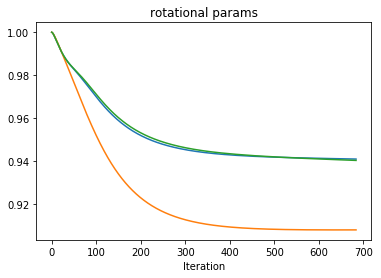

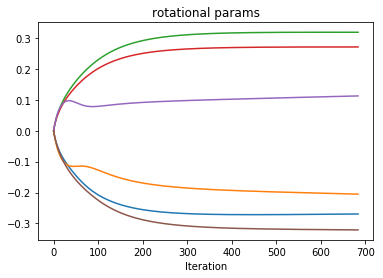

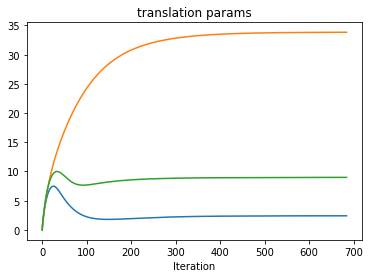

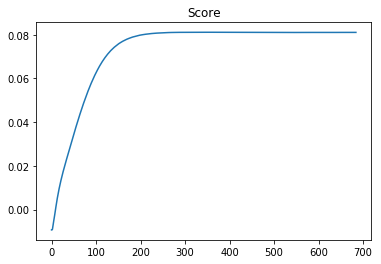

In [44]:
plot_alignment_results(traj=aligner.Ts, scores=aligner.scores, select_best='max_value')

In [45]:
tf_atlas_to_subj = compose_alignment_parameters([T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol, 
                                                         convert_transform_forms(aligner=aligner, out_form=(3,4))])

In [46]:
DataManager.save_alignment_results_v3(transform_parameters=convert_transform_forms(transform=tf_atlas_to_subj, out_form='dict'),
                       score_traj=aligner.scores,
                       parameter_traj=aligner.Ts,
                      alignment_spec=local_alignment_spec)

aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_parameters.json" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_scoreHistory.bp"
0
aws s3 cp "/home/yuncong/CSHL_regist

In [47]:
tf_atlas_to_subj = DataManager.load_alignment_results_v3(local_alignment_spec, what='parameters', out_form=(4,4))

In [48]:
name_s = structure_m

In [49]:
atlas_structure_wrt_canonicalAtlasSpace_atlasResol = DataManager.load_original_volume_v2(stack_spec=stack_m_spec, bbox_wrt='canonicalAtlasSpace', structure=name_s)

In [50]:
aligned_structure_wrt_wholebrain_inputResol = \
transform_volume_v4(volume=atlas_structure_wrt_canonicalAtlasSpace_atlasResol,
                    transform=tf_atlas_to_subj,
                    return_origin_instead_of_bbox=True)

Interpolating/filling sparse volume: 0.07 seconds.


In [51]:
DataManager.save_transformed_volume_v2(volume=aligned_structure_wrt_wholebrain_inputResol, 
                                       alignment_spec=local_alignment_spec)

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_10.0um/score_volumes/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_10.0um_7N_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_10.0um/score_volumes/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_10.0um_7N_R.bp"
0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_10.0um/score_volumes/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_10.0um_7N_R_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_10.0um/score_volumes/atlasV6_10.0um_scoreVolume_7N_R_warp27_CHATM3_detector799_10.0um_scoreVolume_7N_10.0um_7N_

In [55]:
stack = 'CHATM3'

In [56]:
structures_df = DataManager.load_annotation_v4(stack=stack, by_human=True, 
                                               suffix='structuresHanddrawn', 
                                               timestamp='04272018213535')

In [66]:
structures_df = structures_df[~structures_df['volume'].isnull()]

In [67]:
chat_structures, chat_structure_resolution = \
convert_structure_annotation_to_volume_origin_dict_v2(structures_df=structures_df, 
                                                      out_resolution='10.0um', stack=stack)

In [79]:
for name_s, (v, o) in chat_structures.iteritems():
    print name_s
    chat_centroid = get_centroid_3d(v) + o
    
    
    stack_m_spec = dict(name='atlasV6',
                   vol_type='score',
                   structure=name_s,
                    resolution='10.0um'
                   )

    stack_f_spec = dict(name='CHATM3',
                       vol_type='score',
                       detector_id=799,
                       structure=convert_to_original_name(name_s),
                        resolution='10.0um'
                       )

    local_alignment_spec = dict(stack_m=stack_m_spec, 
                          stack_f=stack_f_spec,
                          warp_setting=27)
    
    v, o = DataManager.load_transformed_volume_v2(alignment_spec=local_alignment_spec, return_origin_instead_of_bbox=True)
    alg_centroid = get_centroid_3d(v) + o
    
    print np.linalg.norm(chat_centroid - alg_centroid), 'x 10. um'

7N_L
3.5618372538854364 x 10. um
